# Rareness

## Get All Functions from All Phases and Groups

In [1]:
import pandas as pd
import numpy as np
import collections

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5


%store -r subset_bogota0_phase1
%store -r subset_bogota0_phase2
%store -r subset_bogota0_phase3
%store -r overall_phase3_bogota0
%store -r subset_bogota0_phase4
%store -r overall_phase4_bogota0
%store -r overall_phase5_bogota0
%store -r subset_bogota0_phase5
%store -r subset_bogota1_phase1
%store -r subset_bogota1_phase2
%store -r subset_bogota1_phase3
%store -r overall_phase3_bogota1
%store -r overall_phase4_bogota1
%store -r overall_phase5_bogota1
%store -r subset_bogota1_phase5
%store -r subset_bogota1_phase4
%store -r subset_bogota2_phase1
%store -r subset_bogota2_phase2
%store -r subset_bogota2_phase3
%store -r overall_phase3_bogota2
%store -r overall_phase4_bogota2
%store -r overall_phase5_bogota2
%store -r subset_bogota2_phase5
%store -r subset_bogota3_phase1
%store -r overall_phase1_bogota3
%store -r overall_phase2_bogota3
%store -r subset_bogota3_phase3
%store -r overall_phase3_bogota3
%store -r overall_phase4_bogota3
%store -r overall_phase5_bogota3
%store -r subset_bogota2_phase4

%store -r overall_phase2_bogota0
%store -r overall_phase2_bogota1
%store -r overall_phase2_bogota2
%store -r overall_phase2_bogota3

%store -r overall_phase1_bogota0
%store -r overall_phase1_bogota1
%store -r overall_phase1_bogota2
%store -r overall_phase1_bogota3

In [2]:
## List the 20,000 least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
overall_45['functions'].replace('', np.nan, inplace=True)
overall_45.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out = collections.Counter(x)
list_functions = out.most_common()[:-20000-2:-1]
new_list = []
for x in range(0,len(list_functions)):
    new_list.append(list_functions[x][0])
new_list = list(filter(None, new_list))
len(new_list)

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/4240906067.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/4240906067.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_23 = overall_12.append(overall_phase3, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/4240906067.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_34 = overall_23.append(overall_phase4, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/4240906067.py:6: FutureWarning: The frame.append method is deprecated and will be remo

20000

## Functions Count for Group 0

In [3]:
import seaborn as sns
overall_45_group0 = overall_45.loc[overall_45['Group'] == 0]
overall_45_group0['functions'].replace('', np.nan, inplace=True)
overall_45_group0.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45_group0['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out1 = collections.Counter(x)
df = pd.DataFrame(list(out1.items()))
df = df.rename(columns={0:'Functions', 1:'Count'})
df = df[df['Functions'] != '']
df.sort_values(by='Count', ascending=False, inplace=True)
df_group0 = df.reset_index(drop=True)
df_group0

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/425243717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_45_group0['functions'].replace('', np.nan, inplace=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/425243717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_45_group0.dropna(subset=['functions'], inplace=True)


Functions  Count
0           google.maps.Marker    136
1              google.maps.Map    132
2      document.getElementById    128
3       data.cityofchicago.org     93
4           google.maps.LatLng     78
...                        ...    ...
12485           prototype.size      1
12486          prototype.empty      1
12487           prototype.each      1
12488          polyIn.exponent      1
12489               tmina.push      1

[12490 rows x 2 columns]

In [4]:
# Get the Frequency at each Quantiles for Bogota 0 - No Transparency

for i in np.arange(0, 1, 0.05):
    print("Quantile: %.2f" %i, "Freq: ", df_group0['Count'].quantile(i))

Quantile: 0.00 Freq:  1.0
Quantile: 0.05 Freq:  1.0
Quantile: 0.10 Freq:  1.0
Quantile: 0.15 Freq:  1.0
Quantile: 0.20 Freq:  1.0
Quantile: 0.25 Freq:  4.0
Quantile: 0.30 Freq:  4.0
Quantile: 0.35 Freq:  4.0
Quantile: 0.40 Freq:  4.0
Quantile: 0.45 Freq:  4.0
Quantile: 0.50 Freq:  4.0
Quantile: 0.55 Freq:  4.0
Quantile: 0.60 Freq:  4.0
Quantile: 0.65 Freq:  4.0
Quantile: 0.70 Freq:  4.0
Quantile: 0.75 Freq:  4.0
Quantile: 0.80 Freq:  5.0
Quantile: 0.85 Freq:  6.0
Quantile: 0.90 Freq:  6.0
Quantile: 0.95 Freq:  6.0


<AxesSubplot:>

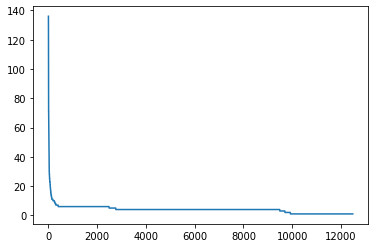

In [5]:
# Distribution Plot for frequency of each functions in the no tranparency group

df_group0['Count'].plot()

## Functions Count for Group 1

In [6]:
import seaborn as sns
overall_45_group1 = overall_45.loc[overall_45['Group'] == 1]
overall_45_group1['functions'].replace('', np.nan, inplace=True)
overall_45_group1.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45_group1['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out1 = collections.Counter(x)
df = pd.DataFrame(list(out1.items()))
df = df.rename(columns={0:'Functions', 1:'Count'})
df = df[df['Functions'] != '']
df.sort_values(by='Count', ascending=False, inplace=True)
df_group1 = df.reset_index(drop=True)
df_group1

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/236794485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_45_group1['functions'].replace('', np.nan, inplace=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/236794485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_45_group1.dropna(subset=['functions'], inplace=True)


Functions  Count
0               google.maps.Map    159
1            google.maps.Marker    155
2       document.getElementById    143
3        data.cityofchicago.org    113
4                    JSON.parse    101
...                         ...    ...
132825         hawaii.translate      1
132826         alaska.translate      1
132827  hawaiiStream.polygonEnd      1
132828  alaskaStream.polygonEnd      1
132829              neig.setMap      1

[132830 rows x 2 columns]

In [7]:
# Get the Frequency at each Quantiles for Bogota 1 - Performance Transparency

for i in np.arange(0, 1, 0.05):
    print("Quantile: %.2f" %i, "Freq: ", df_group1['Count'].quantile(i))

Quantile: 0.00 Freq:  1.0
Quantile: 0.05 Freq:  2.0
Quantile: 0.10 Freq:  2.0
Quantile: 0.15 Freq:  2.0
Quantile: 0.20 Freq:  3.0
Quantile: 0.25 Freq:  4.0
Quantile: 0.30 Freq:  4.0
Quantile: 0.35 Freq:  4.0
Quantile: 0.40 Freq:  4.0
Quantile: 0.45 Freq:  4.0
Quantile: 0.50 Freq:  4.0
Quantile: 0.55 Freq:  4.0
Quantile: 0.60 Freq:  4.0
Quantile: 0.65 Freq:  4.0
Quantile: 0.70 Freq:  4.0
Quantile: 0.75 Freq:  4.0
Quantile: 0.80 Freq:  4.0
Quantile: 0.85 Freq:  4.0
Quantile: 0.90 Freq:  8.0
Quantile: 0.95 Freq:  8.0


<AxesSubplot:>

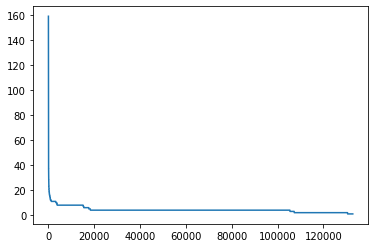

In [8]:
# Distribution Plot for frequency of each functions in the performance tranparency group

df_group1['Count'].plot()

## Functions Count for Group 2

In [9]:
import seaborn as sns
overall_45_group2 = overall_45.loc[overall_45['Group'] == 2]
overall_45_group2['functions'].replace('', np.nan, inplace=True)
overall_45_group2.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45_group2['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out1 = collections.Counter(x)
df = pd.DataFrame(list(out1.items()))
df = df.rename(columns={0:'Functions', 1:'Count'})
df = df[df['Functions'] != '']
df.sort_values(by='Count', ascending=False, inplace=True)
df_group2 = df.reset_index(drop=True)
df_group2

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/2921915474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_45_group2['functions'].replace('', np.nan, inplace=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/2921915474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_45_group2.dropna(subset=['functions'], inplace=True)


Functions  Count
0              google.maps.Map    169
1           google.maps.Marker    165
2      document.getElementById    163
3       data.cityofchicago.org    113
4                      .min.js    101
...                        ...    ...
49797           rawData.filter      1
49798   labelException.indexOf      1
49799      labelException.push      1
49800           removed.length      1
49801      .getElementsAtEvent      1

[49802 rows x 2 columns]

In [10]:
# Get the Frequency at each Quantiles for Bogota 2 - Solution Transparency

for i in np.arange(0, 1, 0.05):
    print("Quantile: %.2f" %i, "Freq: ", df_group2['Count'].quantile(i))

Quantile: 0.00 Freq:  1.0
Quantile: 0.05 Freq:  1.0
Quantile: 0.10 Freq:  2.0
Quantile: 0.15 Freq:  2.0
Quantile: 0.20 Freq:  4.0
Quantile: 0.25 Freq:  4.0
Quantile: 0.30 Freq:  4.0
Quantile: 0.35 Freq:  4.0
Quantile: 0.40 Freq:  4.0
Quantile: 0.45 Freq:  4.0
Quantile: 0.50 Freq:  4.0
Quantile: 0.55 Freq:  4.0
Quantile: 0.60 Freq:  4.0
Quantile: 0.65 Freq:  4.0
Quantile: 0.70 Freq:  4.0
Quantile: 0.75 Freq:  4.0
Quantile: 0.80 Freq:  4.0
Quantile: 0.85 Freq:  5.0
Quantile: 0.90 Freq:  6.0
Quantile: 0.95 Freq:  11.0


<AxesSubplot:>

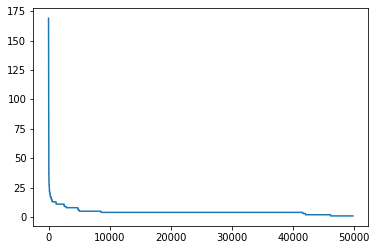

In [11]:
# Distribution Plot for frequency of each functions in the solution tranparency group

df_group2['Count'].plot()

## Functions Count for Group 3

In [12]:
import seaborn as sns
overall_45_group3 = overall_45.loc[overall_45['Group'] == 3]
overall_45_group3['functions'].replace('', np.nan, inplace=True)
overall_45_group3.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45_group3['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out1 = collections.Counter(x)
df = pd.DataFrame(list(out1.items()))
df = df.rename(columns={0:'Functions', 1:'Count'})
df = df[df['Functions'] != '']
df.sort_values(by='Count', ascending=False, inplace=True)
df_group3 = df.reset_index(drop=True)
df_group3

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/3668896778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_45_group3['functions'].replace('', np.nan, inplace=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/3668896778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_45_group3.dropna(subset=['functions'], inplace=True)


Functions  Count
0              document.getElementById    175
1                      google.maps.Map    160
2                   google.maps.Marker    151
3                     bootstrap.min.js    111
4                   google.maps.LatLng    109
...                                ...    ...
90237  this.drawingContext.strokeStyle      1
90238    this.drawingContext.fillStyle      1
90239                      D.prototype      1
90240           this.canvas.getContext      1
90241                    .averagePrice      1

[90242 rows x 2 columns]

In [13]:
# Get the Frequency at each Quantiles for Bogota 3 - Full Transparency

for i in np.arange(0, 1, 0.05):
    print("Quantile: %.2f" %i, "Freq: ", df_group3['Count'].quantile(i))

Quantile: 0.00 Freq:  1.0
Quantile: 0.05 Freq:  1.0
Quantile: 0.10 Freq:  2.0
Quantile: 0.15 Freq:  5.0
Quantile: 0.20 Freq:  5.0
Quantile: 0.25 Freq:  5.0
Quantile: 0.30 Freq:  5.0
Quantile: 0.35 Freq:  5.0
Quantile: 0.40 Freq:  5.0
Quantile: 0.45 Freq:  5.0
Quantile: 0.50 Freq:  5.0
Quantile: 0.55 Freq:  6.0
Quantile: 0.60 Freq:  10.0
Quantile: 0.65 Freq:  10.0
Quantile: 0.70 Freq:  10.0
Quantile: 0.75 Freq:  10.0
Quantile: 0.80 Freq:  10.0
Quantile: 0.85 Freq:  10.0
Quantile: 0.90 Freq:  10.0
Quantile: 0.95 Freq:  10.0


<AxesSubplot:>

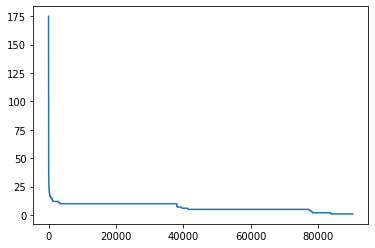

In [14]:
# Distribution Plot for frequency of each functions in the full tranpsrancy group

df_group3['Count'].plot()

## Functions Count for All Sample

In [15]:
df = pd.DataFrame(list(out.items()))
df = df.rename(columns={0:'Functions', 1:'Count'})
df = df[df['Functions'] != '']
df.sort_values(by='Count', ascending=False, inplace=True)
df_all = df.reset_index(drop=True)
df_all

Functions  Count
0                     google.maps.Map    620
1             document.getElementById    609
2                  google.maps.Marker    607
3              data.cityofchicago.org    424
4                  google.maps.LatLng    369
...                               ...    ...
207570  options.jsonpCallbackFunction      1
207571       jsonpScript.setAttribute      1
207572                 jsonpScript.id      1
207573               local.fetchJsonp      1
207574                     tmina.push      1

[207575 rows x 2 columns]

In [16]:
# Get the Frequency at each Quantiles for the Total Sample

for i in np.arange(0, 1, 0.05):
    print("Quantile: %.2f" %i, "Freq: ", df_all['Count'].quantile(i))

Quantile: 0.00 Freq:  1.0
Quantile: 0.05 Freq:  2.0
Quantile: 0.10 Freq:  2.0
Quantile: 0.15 Freq:  2.0
Quantile: 0.20 Freq:  4.0
Quantile: 0.25 Freq:  4.0
Quantile: 0.30 Freq:  4.0
Quantile: 0.35 Freq:  4.0
Quantile: 0.40 Freq:  4.0
Quantile: 0.45 Freq:  4.0
Quantile: 0.50 Freq:  4.0
Quantile: 0.55 Freq:  5.0
Quantile: 0.60 Freq:  5.0
Quantile: 0.65 Freq:  5.0
Quantile: 0.70 Freq:  5.0
Quantile: 0.75 Freq:  8.0
Quantile: 0.80 Freq:  10.0
Quantile: 0.85 Freq:  10.0
Quantile: 0.90 Freq:  18.0
Quantile: 0.95 Freq:  22.0


<AxesSubplot:>

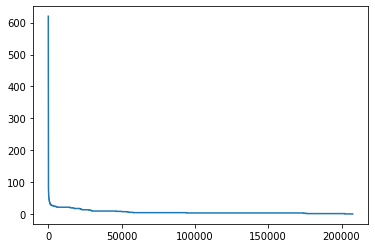

In [17]:
# Distribution Plot for frequency of each functions in the total sample

df_all['Count'].plot()

>> By the end of the discussion on 20th May, 2022, we conclude that we are using 10% as the cut-off for the rare functions. In the overall sample, we have a frequency of 2 at 10% for the functions.  In Bogota 1 ( performance transparency ), Bogota 2 ( solution transparency ), and Bogota 3 ( full transparency ), we have also 2 as the frequency for the quantile of 10%. In bogota 0 ( no tranparency ), although we have a frequency of 1 at the 10% quantile, the jump was straight towards 4 at the quantile of 25%, so we conclude in using 10% as the cut-off. 

## List of Functions with Frequency Count of 1 in Total Sample

In [18]:
[k for k, v in out.items() if v == 1]


[' lml.jpg',
 ' .floating',
 ' application.js',
 'this.App',
 'App.cable',
 'ActionCable.createConsumer',
 'div.dialog',
 'beaches.length',
 'userMarker.getPosition',
 'initialMarker.setAnimation',
 'initialMarker.addListener',
 'initialMarker.getAnimation',
 'selection.v',
 'event.target.matches',
 'dropdowns.length',
 'openDropdown.classList.contains',
 'openDropdown.classList.remove',
 'boton.type',
 'boton.addEventListener',
 ' blueberry.css',
 'mapExercise.printer',
 'mapExercise.markerButtonClicked',
 'MapExercise.markerButtonClicked',
 'imageManager.js',
 'cases.block',
 'cases.district',
 ' document.createElement',
 '.flex',
 'developers.google',
 'google.maps.Latlng',
 'google.maps.mapTypeId.ROADMAP',
 'custommovile.css',
 'this.parentElement.style.display',
 'spotlight.jpg',
 'm.schuepfen.ch',
 ' stylesheet.css',
 ' mainPage.css',
 'input.getElementsByTagName',
 'CENTER.lat',
 'CENTER.lng',
 ' eslint.org',
 'RULES.md',
 'webpack.base.conf',
 'Vue.config.productionTip',
 'webp

## List of Functions with Frequency Count of 2 in Total Sample

In [19]:
[k for k, v in out.items() if v == 2]


['wData.push',
 'wData.length',
 'aux.longitude',
 'UI.jpg',
 'inpObj.checkValidity',
 'inpObj.validationMessage',
 '.dropbtn',
 'jquery.blueberry.js',
 '.blueberry',
 ' cs.css',
 'location.svg',
 'googleMaps.js',
 'house.zip',
 'house.x',
 'house.y',
 'house.location',
 'fxLayout.xs',
 'fxFlexOrder.xs',
 'px.svg',
 'crime.address',
 'crime.property',
 'crime.phone',
 'crime.zip',
 'crime.management',
 'crime.units',
 'crime.x',
 'crime.y',
 'concha.jpg',
 'allRows.length',
 'e.mindate',
 'e.maxdate',
 'e.datacoverage',
 'table.row',
 'e.location.coordinates',
 'e.phone',
 'e.zip',
 'dataset.forEach',
 'resetStyle.css',
 'loadUpData.js',
 'grayscale.min.js',
 ' script.js',
 '.Condom',
 'datasetCondoms.js',
 'Chicago.jpg',
 'google.maps.SymbolPath.BACKWARD',
 'chi.append',
 'sodaConsumer.query',
 'o.geometry',
 'value.longitude',
 'value.latitude',
 'o.properties',
 'layers.forEach',
 'PRCP.reduce',
 'SNOW.reduce',
 'blueberry.css',
 'mapExercise.showLibrariesButtonClicked',
 'mapExerci

## List of Functions with Frequency Count of 3 in Total Sample

In [20]:
[k for k, v in out.items() if v == 3]


['.mcheck',
 'jsondata.js',
 'data.year',
 'info.uuid',
 'sdk.js',
 'MapExercise.initGoogleMap',
 'mapExercise.initGoogleMap',
 'mediaqueries.js',
 'locationsNear.push',
 'locationsNear.length',
 'findMeHome.js',
 'document.searchform.kmsTo.value',
 'document.searchform.moneyTo.value',
 'document.resultform.houseTo.value',
 '.police',
 'mycss.css',
 '.TMAX',
 'collection.v',
 'dispatch.v',
 'dsv.v',
 'request.v',
 'xmlResponse.responseText',
 'parks.data.length',
 'parks.data',
 'libraries.data.length',
 'libraries.data',
 'locations.map',
 'labels.push',
 'datarray.protype',
 'datarray.proname',
 'datarray.adress',
 'datarray.zip',
 'datarray.phone',
 'Terms.htm',
 '.schemeCategory',
 'd.class',
 'line.getElementsAtEvent',
 'line.data.datasets',
 'line.data.labels',
 'result.climate.url',
 'result.climate.token',
 'result.climate.stationid',
 'result.climate.datasetid',
 'obj.jsonData.stationid',
 'obj.jsonData.datasetid',
 'obj.jsonData.token',
 'filledHouse.jpg',
 'arrayPoliceStatio

In [21]:
round (len(out) * 0.05)

10379

In [22]:
round (len(out) * 0.1)

20758

In [23]:
round(len(out) * 0.15)

31136

In [24]:
round(len(out) * 0.2)

41515

In [25]:
## List the 5% least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
overall_45['functions'].replace('', np.nan, inplace=True)
overall_45.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out = collections.Counter(x)
list_functions = out.most_common()[:-10379-2:-1]
top_5_unique = []
for x in range(0,len(list_functions)):
    top_5_unique.append(list_functions[x][0])
top_5_unique = list(filter(None, top_5_unique))
len(top_5_unique)

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1325184692.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1325184692.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_23 = overall_12.append(overall_phase3, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1325184692.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_34 = overall_23.append(overall_phase4, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1325184692.py:6: FutureWarning: The frame.append method is deprecated and will be remo

10379

In [26]:
## List the 10% least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
overall_45['functions'].replace('', np.nan, inplace=True)
overall_45.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out = collections.Counter(x)
list_functions = out.most_common()[:-20758-2:-1]
top_10_unique = []
for x in range(0,len(list_functions)):
    top_10_unique.append(list_functions[x][0])
top_10_unique = list(filter(None, top_10_unique))
len(top_10_unique)

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/2765766539.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/2765766539.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_23 = overall_12.append(overall_phase3, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/2765766539.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_34 = overall_23.append(overall_phase4, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/2765766539.py:6: FutureWarning: The frame.append method is deprecated and will be remo

20758

In [27]:
## List the 15% least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
overall_45['functions'].replace('', np.nan, inplace=True)
overall_45.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out = collections.Counter(x)
list_functions = out.most_common()[:-31136-2:-1]
top_15_unique = []
for x in range(0,len(list_functions)):
    top_15_unique.append(list_functions[x][0])
top_15_unique = list(filter(None, top_15_unique))
len(top_15_unique)

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/38987531.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/38987531.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_23 = overall_12.append(overall_phase3, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/38987531.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_34 = overall_23.append(overall_phase4, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/38987531.py:6: FutureWarning: The frame.append method is deprecated and will be removed from

31136

In [28]:
## List the 20% least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
overall_45['functions'].replace('', np.nan, inplace=True)
overall_45.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out = collections.Counter(x)
list_functions = out.most_common()[:-41515-2:-1]
top_20_unique = []
for x in range(0,len(list_functions)):
    top_20_unique.append(list_functions[x][0])
top_20_unique = list(filter(None, top_20_unique))
len(top_20_unique)

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1035611186.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1035611186.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_23 = overall_12.append(overall_phase3, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1035611186.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_34 = overall_23.append(overall_phase4, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1035611186.py:6: FutureWarning: The frame.append method is deprecated and will be remo

41515

In [29]:
list_functions = out.most_common(20000)
list_functions

[('google.maps.Map', 620),
 ('document.getElementById', 609),
 ('google.maps.Marker', 607),
 ('data.cityofchicago.org', 424),
 ('google.maps.LatLng', 369),
 ('jquery.min.js', 364),
 ('JSON.parse', 349),
 ('bootstrap.min.js', 315),
 ('rows.json', 299),
 ('.innerHTML', 297),
 ('.min.js', 283),
 ('.js', 277),
 ('xmlhttp.send', 276),
 ('xmlhttp.open', 274),
 ('xmlhttp.onreadystatechange', 269),
 ('console.log', 267),
 ('google.maps.InfoWindow', 257),
 ('xmlhttp.responseText', 257),
 ('xmlhttp.readyState', 254),
 ('xmlhttp.status', 254),
 ('.each', 251),
 ('.v', 241),
 ('google.maps.event.addListener', 237),
 ('js.org', 216),
 ('infowindow.open', 204),
 ('.ajax', 202),
 ('json.data', 202),
 ('bootstrap.min.css', 194),
 ('.append', 193),
 ('.on', 188),
 ('.ready', 181),
 ('.value', 180),
 ('.text', 178),
 ('Math.random', 175),
 ('.click', 174),
 (' bootstrap.min.css', 172),
 ('.data', 168),
 ('.attr', 167),
 ('document.createElement', 164),
 ('Math.PI', 161),
 ('.css', 158),
 ('style.css', 1

list_functions2 = [(name, count) for name, count in list_functions]
plt.plot(*zip(*list_functions2))
plt.show()

In [30]:
list_functions2 = [count for name, count in list_functions]
list_functions2

[620,
 609,
 607,
 424,
 369,
 364,
 349,
 315,
 299,
 297,
 283,
 277,
 276,
 274,
 269,
 267,
 257,
 257,
 254,
 254,
 251,
 241,
 237,
 216,
 204,
 202,
 202,
 194,
 193,
 188,
 181,
 180,
 178,
 175,
 174,
 172,
 168,
 167,
 164,
 161,
 158,
 157,
 155,
 154,
 154,
 154,
 150,
 149,
 149,
 148,
 143,
 140,
 139,
 136,
 135,
 135,
 134,
 134,
 128,
 127,
 124,
 122,
 119,
 118,
 113,
 111,
 111,
 111,
 109,
 108,
 108,
 108,
 107,
 107,
 107,
 107,
 106,
 104,
 104,
 103,
 103,
 103,
 102,
 102,
 102,
 102,
 101,
 101,
 101,
 100,
 99,
 99,
 99,
 99,
 98,
 97,
 97,
 97,
 96,
 96,
 95,
 94,
 94,
 94,
 94,
 93,
 93,
 92,
 92,
 91,
 91,
 90,
 90,
 90,
 90,
 90,
 89,
 89,
 89,
 89,
 88,
 87,
 87,
 87,
 86,
 86,
 86,
 86,
 86,
 85,
 85,
 85,
 85,
 85,
 85,
 84,
 84,
 84,
 84,
 83,
 83,
 83,
 82,
 82,
 82,
 81,
 81,
 81,
 80,
 80,
 80,
 79,
 78,
 78,
 78,
 77,
 77,
 77,
 77,
 77,
 77,
 76,
 76,
 76,
 76,
 76,
 75,
 75,
 75,
 75,
 75,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 73,
 73,
 73,


In [31]:
list_functions2 = [name for name, count in list_functions]
list_functions2

['google.maps.Map',
 'document.getElementById',
 'google.maps.Marker',
 'data.cityofchicago.org',
 'google.maps.LatLng',
 'jquery.min.js',
 'JSON.parse',
 'bootstrap.min.js',
 'rows.json',
 '.innerHTML',
 '.min.js',
 '.js',
 'xmlhttp.send',
 'xmlhttp.open',
 'xmlhttp.onreadystatechange',
 'console.log',
 'google.maps.InfoWindow',
 'xmlhttp.responseText',
 'xmlhttp.readyState',
 'xmlhttp.status',
 '.each',
 '.v',
 'google.maps.event.addListener',
 'js.org',
 'infowindow.open',
 '.ajax',
 'json.data',
 'bootstrap.min.css',
 '.append',
 '.on',
 '.ready',
 '.value',
 '.text',
 'Math.random',
 '.click',
 ' bootstrap.min.css',
 '.data',
 '.attr',
 'document.createElement',
 'Math.PI',
 '.css',
 'style.css',
 '.length',
 '.slice',
 'Math.cos',
 '.push',
 '.main',
 '.remove',
 'Math.sin',
 '.done',
 'api.openweathermap.org',
 'Math.min',
 'data.length',
 'Math.max',
 '.toUpperCase',
 '.map',
 'infowindow.setContent',
 'Math.sqrt',
 '.style',
 'json.weather',
 '.select',
 'locations.push',
 'in

In [32]:
## Remove all duplicates and empty string from the entire function list

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
overall_45['functions'].replace('', np.nan, inplace=True)
overall_45.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
remove_duplicates = list(set(x))
remove_all_duplicates = list(filter(None, remove_duplicates))
total_unique_functions_global = len(remove_all_duplicates)

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/430780864.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/430780864.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_23 = overall_12.append(overall_phase3, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/430780864.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_34 = overall_23.append(overall_phase4, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/430780864.py:6: FutureWarning: The frame.append method is deprecated and will be removed 

In [33]:
str1 = ','.join(remove_all_duplicates)
#subset_bogota0_phase5.loc[len(subset_bogota0_phase5.index)] = ['all', str1, 0]
str1

'schedulerProto.scheduleWithRelativeAndState,c.eo,ZmMsg.findLabel,notifier.setRoom,this.ticksbelowgauge,prop.value,asahi.nagano.jp,da.previousNegativeY,MochiKit.Base.flattenArguments,.Date.toISOString,answers.requirejs,resultMap.set,this.autoStart,this.MurmurHash,SelectControlValueAccessor.prototype.writeValue,base.calculateWidth,node.thedef,DomElementSchemaRegistry.prototype.validateAttribute,.dependencies.length,CapturedTrace.prototype.attachExtraTrace,Container.prototype.prepend,this.addFailureOnIdentifier,this.Query,m.apply,details.print,requestOptions.headers,WebInspector.debuggerModel.scriptForSourceID,PrivateKey.prototype.derive,this.ref.detach,city.timezone,this.parent.notifyComplete,this.suite.bail,this.scaleMiles,this.lq.vj,ZmMsg.subjectDecline,xmlhttpGrocery.onreadystatechange,v.frame,dyndns.info,delimiter.escapeHTML,vows.describe,currentNav.parent,StaticAndDynamicReflectionCapabilities.prototype.setter,this.online,ZmMsg.imScreenNameYahoo,.renames,div.empty,doc.styleSheets.l

In [34]:
global_functions = {'Student': ['all'], 'functions': str1, 'phase': [0]}
global_functions = pd.DataFrame(data=global_functions)
global_functions

Student                                          functions  phase
0     all  schedulerProto.scheduleWithRelativeAndState,c....      0

## Append Global Functions with Bogota 0 Phase 5

In [35]:
subset_bogota0_phase5_all = subset_bogota0_phase5.append(global_functions, ignore_index=True)
print(subset_bogota0_phase5_all)

           Student                                          functions  phase
0        fffeelipe  .ready,.click,.css,.removeClass,.is,.val,.chec...      5
1        mnguzmanc  house.ico,style.css,.css,main.js,map.js,weathe...      5
2       jmcuestasb  js.org,.v,.min.js,weather.js,myss.css,bootstra...      5
3       katherinsb  reset.css,layout.css,style.css,jquery.min.js,....      5
4     jjrodriguezn  google.maps.Map,document.getElementById,google...      5
5            DglyP  bootstrap.min.css,style.css,jquery.min.js,mark...      5
6      Judgarciani  bootstrap.min.css,jquery.min.js,bootstrap.min....      5
7        sacastroc  bootstrap.min.css,theme.min.css,jquery.min.js,...      5
8        pcberriop  Map.js,.js,main.css,avatar.jpg,pcberriop.githu...      5
9      hsmartineza  jquery.min.js,.js,map.js,house.js,weather.js,p...      5
10        Moimolcp  bootstrap.min.css,style.css,script.js,dataPric...      5
11     CamiloRueda  layout.css,shiv.js,document.getElementById,goo...      5

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/4036613422.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota0_phase5_all = subset_bogota0_phase5.append(global_functions, ignore_index=True)


In [36]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase5_all["functions"], subset_bogota0_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase5_compare_all = pd.DataFrame(result)
subset_bogota0_phase5_compare_all

user1         user2  similarity
0      fffeelipe     mnguzmanc    0.796296
1      fffeelipe    jmcuestasb    0.796296
2      fffeelipe    katherinsb    0.796296
3      fffeelipe  jjrodriguezn    0.723404
4      fffeelipe         DglyP    0.796296
..           ...           ...         ...
491   janoguerab    anmmunozme    0.740741
492   janoguerab           all    0.727273
493  djsanabriac    anmmunozme    0.722222
494  djsanabriac           all    0.709091
495   anmmunozme           all    0.981818

[496 rows x 3 columns]

In [37]:
subset_bogota0_phase5_all_only = subset_bogota0_phase5_compare_all.loc[subset_bogota0_phase5_compare_all['user2'] == 'all']
subset_bogota0_phase5_all_only

user1 user2  similarity
30        fffeelipe   all    0.781818
60        mnguzmanc   all    0.981818
89       jmcuestasb   all    0.981818
117      katherinsb   all    0.981818
144    jjrodriguezn   all    0.690909
170           DglyP   all    0.981818
195     Judgarciani   all    0.890909
219       sacastroc   all    0.818182
242       pcberriop   all    0.818182
264     hsmartineza   all    0.800000
285        Moimolcp   all    0.763636
305     CamiloRueda   all    0.654545
324      JoseMolano   all    0.872727
342   maikellPardoA   all    0.545455
359      NicolasZon   all    0.654545
375       camilo654   all    0.581818
390  CristianLozano   all    0.454545
404       jdsuarezj   all    0.872727
417       pipemax85   all    0.709091
429     juandavidro   all    0.581818
440  UNhcrodriguezl   all    0.909091
450     camilo13152   all    0.872727
459    leavendanoro   all    0.781818
467      cdcordobaa   all    0.636364
474      capinillab   all    0.763636
480    lfvalderrama   all    0.854545
485       bsgarciac   all    0.872727
489          gabi04   all    0.854545
492      janoguerab   all    0.727273
494     djsanabriac   all    0.709091
495      anmmunozme   all    0.981818

## Append Global Functions with Bogota 0 Phase 4

In [38]:
subset_bogota0_phase4_all = subset_bogota0_phase4.append(global_functions, ignore_index=True)
print(subset_bogota0_phase4_all)

           Student                                          functions  phase
0        fffeelipe  .ready,.click,.removeClass,.is,.val,.check,.on...      4
1        mnguzmanc  house.ico,style.css,.css,main.js,map.js,weathe...      4
2       jmcuestasb  js.org,.v,.min.js,weather.js,mycss.css,bootstr...      4
3       katherinsb  reset.css,layout.css,style.css,.js,yui.js,repl...      4
4     jjrodriguezn  google.maps.Map,document.getElementById,google...      4
5            DglyP  bootstrap.min.css,style.css,jquery.min.js,mark...      4
6      Judgarciani  bootstrap.min.css,jquery.min.js,bootstrap.min....      4
7        sacastroc  js.org,.v,.min.js,collection.v,dispatch.v,dsv....      4
8        pcberriop  jquery.min.js,Map.js,main.css,avatar.jpg,pcber...      4
9      hsmartineza  jquery.min.js,.js,map.js,house.js,weather.js,p...      4
10        Moimolcp  bootstrap.min.css,style.css,script.js,jquery.m...      4
11     CamiloRueda  layout.css,shiv.js,document.getElementById,goo...      4

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1991837394.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota0_phase4_all = subset_bogota0_phase4.append(global_functions, ignore_index=True)


In [39]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase4_all["functions"], subset_bogota0_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase4_compare_all = pd.DataFrame(result)
subset_bogota0_phase4_compare_all

user1         user2  similarity
0      fffeelipe     mnguzmanc    0.796296
1      fffeelipe    jmcuestasb    0.796296
2      fffeelipe    katherinsb    0.720930
3      fffeelipe  jjrodriguezn    0.739130
4      fffeelipe         DglyP    0.796296
..           ...           ...         ...
491   janoguerab    anmmunozme    0.772727
492   janoguerab           all    0.727273
493  djsanabriac    anmmunozme    0.878049
494  djsanabriac           all    0.709091
495   anmmunozme           all    0.690909

[496 rows x 3 columns]

In [40]:
subset_bogota0_phase4_all_only = subset_bogota0_phase4_compare_all.loc[subset_bogota0_phase4_compare_all['user2'] == 'all']
subset_bogota0_phase4_all_only

user1 user2  similarity
30        fffeelipe   all    0.781818
60        mnguzmanc   all    0.981818
89       jmcuestasb   all    0.981818
117      katherinsb   all    0.563636
144    jjrodriguezn   all    0.672727
170           DglyP   all    0.981818
195     Judgarciani   all    0.854545
219       sacastroc   all    0.818182
242       pcberriop   all    0.818182
264     hsmartineza   all    0.781818
285        Moimolcp   all    0.727273
305     CamiloRueda   all    0.654545
324      JoseMolano   all    0.872727
342   maikellPardoA   all    0.545455
359      NicolasZon   all    0.654545
375       camilo654   all    0.581818
390  CristianLozano   all    0.454545
404       jdsuarezj   all    0.872727
417       pipemax85   all    0.709091
429     juandavidro   all    0.581818
440  UNhcrodriguezl   all    0.909091
450     camilo13152   all    0.872727
459    leavendanoro   all    0.800000
467      cdcordobaa   all    0.636364
474      capinillab   all    0.781818
480    lfvalderrama   all    0.836364
485       bsgarciac   all    0.872727
489          gabi04   all    0.854545
492      janoguerab   all    0.727273
494     djsanabriac   all    0.709091
495      anmmunozme   all    0.690909

## Append Global Functions with Bogota 0 Phase 3

In [41]:
subset_bogota0_phase3_all = subset_bogota0_phase3.append(global_functions, ignore_index=True)
print(subset_bogota0_phase3_all)

           Student                                          functions  phase
0        fffeelipe  .ready,.click,.mcheck,.on,.closest,.list,.find...      3
1        mnguzmanc  house.ico,style.css,.css,main.js,map.js,weathe...      3
2       jmcuestasb  js.org,.v,.min.js,weather.js,mycss.css,bootstr...      3
3     jjrodriguezn  google.maps.Map,document.getElementById,google...      3
4            DglyP  google.maps.Map,document.getElementById,google...      3
5      Judgarciani  bootstrap.min.css,jquery.min.js,bootstrap.min....      3
6        sacastroc  js.org,.v,.min.js,collection.v,dispatch.v,dsv....      3
7        pcberriop  google.maps.Map,document.getElementById,google...      3
8      hsmartineza  jquery.min.js,.js,map.js,info.js,test.js,chica...      3
9         Moimolcp  bootstrap.min.css,style.css,script.js,jquery.m...      3
10     CamiloRueda  layout.css,shiv.js,document.getElementById,goo...      3
11      JoseMolano  bootstrap.min.css,theme.min.css,jquery.min.js,...      3

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1179508910.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota0_phase3_all = subset_bogota0_phase3.append(global_functions, ignore_index=True)


In [42]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase3_all["functions"], subset_bogota0_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase3_compare_all = pd.DataFrame(result)
subset_bogota0_phase3_compare_all

user1         user2  similarity
0      fffeelipe     mnguzmanc    0.629630
1      fffeelipe    jmcuestasb    0.629630
2      fffeelipe  jjrodriguezn    0.731707
3      fffeelipe         DglyP    0.775000
4      fffeelipe   Judgarciani    0.739130
..           ...           ...         ...
460   janoguerab    anmmunozme    0.761905
461   janoguerab           all    0.727273
462  djsanabriac    anmmunozme    0.825000
463  djsanabriac           all    0.709091
464   anmmunozme           all    0.618182

[465 rows x 3 columns]

In [43]:
subset_bogota0_phase3_all_only = subset_bogota0_phase3_compare_all.loc[subset_bogota0_phase3_compare_all['user2'] == 'all']
subset_bogota0_phase3_all_only

user1 user2  similarity
29        fffeelipe   all    0.618182
58        mnguzmanc   all    0.981818
86       jmcuestasb   all    0.981818
113    jjrodriguezn   all    0.672727
139           DglyP   all    0.672727
164     Judgarciani   all    0.836364
188       sacastroc   all    0.781818
211       pcberriop   all    0.781818
233     hsmartineza   all    0.781818
254        Moimolcp   all    0.709091
274     CamiloRueda   all    0.654545
293      JoseMolano   all    0.872727
311   maikellPardoA   all    0.545455
328      NicolasZon   all    0.654545
344       camilo654   all    0.672727
359  CristianLozano   all    0.454545
373       jdsuarezj   all    0.872727
386       pipemax85   all    0.709091
398     juandavidro   all    0.581818
409  UNhcrodriguezl   all    0.909091
419     camilo13152   all    0.872727
428    leavendanoro   all    0.745455
436      cdcordobaa   all    0.636364
443      capinillab   all    0.636364
449    lfvalderrama   all    0.836364
454       bsgarciac   all    0.854545
458          gabi04   all    0.854545
461      janoguerab   all    0.727273
463     djsanabriac   all    0.709091
464      anmmunozme   all    0.618182

## Append Global Functions with Bogota 0 Phase 2

In [44]:
subset_bogota0_phase2_all = subset_bogota0_phase2.append(global_functions, ignore_index=True)
print(subset_bogota0_phase2_all)

           Student                                          functions  phase
0        fffeelipe  .ready,.click,.mcheck,.on,.closest,.list,.find...      2
1        mnguzmanc  house.ico,style.css,map.js,Chicago.jpg,documen...      2
2       jmcuestasb  js.org,.v,.min.js,weather.js,mycss.css,bootstr...      2
3     jjrodriguezn  data.cityofchicago.org,rows.json,.ajax,google....      2
4            DglyP  google.maps.Map,document.getElementById,google...      2
5      Judgarciani  bootstrap.min.css,jquery.min.js,bootstrap.min....      2
6        sacastroc  js.org,.v,.min.js,collection.v,dispatch.v,dsv....      2
7        pcberriop  google.maps.Map,document.getElementById,google...      2
8      hsmartineza  jquery.min.js,.js,info.js,chicago.jpg,document...      2
9         Moimolcp  style.css,script.js,jquery.min.js,google.maps....      2
10     CamiloRueda  layout.css,shiv.js,document.getElementById,goo...      2
11      JoseMolano  bootstrap.min.css,theme.min.css,jquery.min.js,...      2

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1402664656.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota0_phase2_all = subset_bogota0_phase2.append(global_functions, ignore_index=True)


In [45]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase2_all["functions"], subset_bogota0_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase2_compare_all = pd.DataFrame(result)
subset_bogota0_phase2_compare_all

user1         user2  similarity
0      fffeelipe     mnguzmanc    0.750000
1      fffeelipe    jmcuestasb    0.629630
2      fffeelipe  jjrodriguezn    0.825000
3      fffeelipe         DglyP    0.775000
4      fffeelipe   Judgarciani    0.733333
..           ...           ...         ...
460   janoguerab    anmmunozme    0.697674
461   janoguerab           all    0.727273
462  djsanabriac    anmmunozme    0.800000
463  djsanabriac           all    0.709091
464   anmmunozme           all    0.600000

[465 rows x 3 columns]

In [46]:
subset_bogota0_phase2_all_only = subset_bogota0_phase2_compare_all.loc[subset_bogota0_phase2_compare_all['user2'] == 'all']
subset_bogota0_phase2_all_only

user1 user2  similarity
29        fffeelipe   all    0.618182
58        mnguzmanc   all    0.654545
86       jmcuestasb   all    0.981818
113    jjrodriguezn   all    0.709091
139           DglyP   all    0.672727
164     Judgarciani   all    0.800000
188       sacastroc   all    0.690909
211       pcberriop   all    0.781818
233     hsmartineza   all    0.709091
254        Moimolcp   all    0.654545
274     CamiloRueda   all    0.654545
293      JoseMolano   all    0.836364
311   maikellPardoA   all    0.545455
328      NicolasZon   all    0.654545
344       camilo654   all    0.672727
359  CristianLozano   all    0.454545
373       jdsuarezj   all    0.836364
386       pipemax85   all    0.690909
398     juandavidro   all    0.927273
409  UNhcrodriguezl   all    0.872727
419     camilo13152   all    0.563636
428    leavendanoro   all    0.727273
436      cdcordobaa   all    0.636364
443      capinillab   all    0.636364
449    lfvalderrama   all    0.727273
454       bsgarciac   all    0.763636
458          gabi04   all    0.836364
461      janoguerab   all    0.727273
463     djsanabriac   all    0.709091
464      anmmunozme   all    0.600000

## Append Global Functions with Bogota 0 Phase 1

In [47]:
subset_bogota0_phase1_all = subset_bogota0_phase1.append(global_functions, ignore_index=True)
print(subset_bogota0_phase1_all)

           Student                                          functions  phase
0        fffeelipe  .ready,.click,.mcheck,.on,.closest,.list,.find...      1
1        mnguzmanc  style.css,map.js,document.getElementById,googl...      1
2            DglyP               bootstrap.min.css,style.css,.JS,.js,      1
3      Judgarciani  jquery.min.js,.js,Rent.js,Crimes.js,google.map...      1
4        sacastroc  js.org,.v,.min.js,bootstrap.min.css,theme.min....      1
5        pcberriop  google.maps.Map,document.getElementById,google...      1
6      hsmartineza  jquery.min.js,.js,info.js,document.getElementB...      1
7         Moimolcp  style.css,script.js,jquery.min.js,google.maps....      1
8       JoseMolano  document.getElementById,google.maps.Map,google...      1
9    maikellPardoA  document.getElementById,google.maps.Map,google...      1
10      NicolasZon  lml.jpg,google.maps.LatLng,google.maps.MapType...      1
11       camilo654  .floating,document.getElementById,google.maps....      1

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/533454939.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota0_phase1_all = subset_bogota0_phase1.append(global_functions, ignore_index=True)


In [48]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase1_all["functions"], subset_bogota0_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase1_compare_all = pd.DataFrame(result)
subset_bogota0_phase1_compare_all

user1        user2  similarity
0      fffeelipe    mnguzmanc    0.676471
1      fffeelipe        DglyP    0.558824
2      fffeelipe  Judgarciani    0.690476
3      fffeelipe    sacastroc    0.617647
4      fffeelipe    pcberriop    0.790698
..           ...          ...         ...
346   janoguerab   anmmunozme    0.846154
347   janoguerab          all    0.400000
348  djsanabriac   anmmunozme    0.666667
349  djsanabriac          all    0.709091
350   anmmunozme          all    0.472727

[351 rows x 3 columns]

In [49]:
subset_bogota0_phase1_all_only = subset_bogota0_phase1_compare_all.loc[subset_bogota0_phase1_compare_all['user2'] == 'all']
subset_bogota0_phase1_all_only

user1 user2  similarity
25        fffeelipe   all    0.618182
50        mnguzmanc   all    0.418182
74            DglyP   all    0.345455
97      Judgarciani   all    0.672727
119       sacastroc   all    0.381818
140       pcberriop   all    0.781818
160     hsmartineza   all    0.672727
179        Moimolcp   all    0.654545
197      JoseMolano   all    0.400000
214   maikellPardoA   all    0.545455
230      NicolasZon   all    0.672727
245       camilo654   all    0.436364
259  CristianLozano   all    0.400000
272       jdsuarezj   all    0.745455
284       pipemax85   all    0.690909
295     juandavidro   all    0.927273
305  UNhcrodriguezl   all    0.600000
314     camilo13152   all    0.418182
322    leavendanoro   all    0.563636
329      cdcordobaa   all    0.581818
335      capinillab   all    0.454545
340    lfvalderrama   all    0.709091
344       bsgarciac   all    0.654545
347      janoguerab   all    0.400000
349     djsanabriac   all    0.709091
350      anmmunozme   all    0.472727

## Append Global Functions with Bogota 1 Phase 5

In [50]:
subset_bogota1_phase5_all = subset_bogota1_phase5.append(global_functions, ignore_index=True)
print(subset_bogota1_phase5_all)

           Student                                          functions  phase
0        gasierram  illinois.edu,favicon.ico,bootstrap.min.css,awe...      5
1     adamantwharf  document.getElementById,google.maps.Map,google...      5
2        bdcajicam  nearium.css,.js,nearium.js,google.maps.Map,doc...      5
3      dfhincapiem  main.js,google.maps.Map,document.getElementByI...      5
4        helmeraac  styles.css,jquery.min.js,integration.js,script...      5
5       dasalgadob  bootstrap.min.css,theme.min.css,jquery.min.js,...      5
6       falperezgo  .ajax,data.cityofchicago.org,rows.json,.done,m...      5
7        djguzmanc  google.maps.LatLng,google.maps.Map,document.ge...      5
8       gsuarezc04  google.maps.LatLng,google.maps.MapTypeId.ROADM...      5
9           oeroaq  .css,style.css,bootstrap.css,balloon.css,js.or...      5
10     Semoralesga  style.css,bootstrap.min.css,.js,scripts.js,js....      5
11      jonatan360  awesome.min.css,bootstrap.min.css,style.css,ch...      5

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1782534476.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota1_phase5_all = subset_bogota1_phase5.append(global_functions, ignore_index=True)


In [51]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase5_all["functions"], subset_bogota1_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase5_compare_all = pd.DataFrame(result)
subset_bogota1_phase5_compare_all

user1         user2  similarity
0         gasierram  adamantwharf    0.500000
1         gasierram     bdcajicam    0.909091
2         gasierram   dfhincapiem    0.545455
3         gasierram     helmeraac    0.693878
4         gasierram    dasalgadob    0.500000
..              ...           ...         ...
661        jcrubioa  JairVillalba    0.843137
662        jcrubioa           all    0.927273
663  joahernandezca  JairVillalba    0.843137
664  joahernandezca           all    0.927273
665    JairVillalba           all    0.781818

[666 rows x 3 columns]

In [52]:
subset_bogota1_phase5_all_only = subset_bogota1_phase5_compare_all.loc[subset_bogota1_phase5_compare_all['user2'] == 'all']
subset_bogota1_phase5_all_only

user1 user2  similarity
35        gasierram   all    0.800000
70     adamantwharf   all    0.400000
104       bdcajicam   all    0.727273
137     dfhincapiem   all    0.436364
169       helmeraac   all    0.709091
200      dasalgadob   all    0.400000
230      falperezgo   all    0.981818
259       djguzmanc   all    0.800000
287      gsuarezc04   all    0.836364
314          oeroaq   all    0.981818
340     Semoralesga   all    0.600000
365      jonatan360   all    0.927273
389  jesusfchavarro   all    0.981818
412  jesusfchavarro   all    0.981818
434    stevenbustos   all    0.690909
455  jufcontrerasco   all    0.836364
475      dsbarrerag   all    0.781818
494       wolfstain   all    0.945455
512      miaborjaac   all    0.872727
529   ivdgonzalezco   all    0.854545
545    Christian7sr   all    0.654545
560      jsnarvaezb   all    0.854545
574   gfalbarracinr   all    0.690909
587        aldiazve   all    0.981818
599  diegoaguevarar   all    0.909091
610      fevargasmo   all    0.781818
620      jmhurtadoc   all    0.927273
629     anfmorenoso   all    0.727273
637     nabautistal   all    0.818182
644          crigar   all    0.454545
650     jiapulidoar   all    0.981818
655       jsviveroj   all    0.890909
659      daandradec   all    0.945455
662        jcrubioa   all    0.927273
664  joahernandezca   all    0.927273
665    JairVillalba   all    0.781818

## Append Global Functions with Bogota 1 Phase 4

In [53]:
subset_bogota1_phase4_all = subset_bogota1_phase4.append(global_functions, ignore_index=True)
print(subset_bogota1_phase4_all)

           Student                                          functions  phase
0        gasierram  illinois.edu,favicon.ico,bootstrap.min.css,awe...      4
1     adamantwharf  document.getElementById,google.maps.Map,google...      4
2        bdcajicam  nearium.css,.js,nearium.js,google.maps.Map,doc...      4
3      dfhincapiem  main.js,google.maps.Map,document.getElementByI...      4
4        helmeraac  styles.css,jquery.min.js,integration.js,script...      4
5       dasalgadob  bootstrap.min.css,theme.min.css,jquery.min.js,...      4
6       falperezgo  .ajax,data.cityofchicago.org,rows.json,.done,c...      4
7        djguzmanc  google.maps.LatLng,google.maps.Map,document.ge...      4
8       gsuarezc04  google.maps.LatLng,google.maps.MapTypeId.ROADM...      4
9           oeroaq  .css,style.css,bootstrap.css,balloon.css,jquer...      4
10         gcantem  window.XMLHttpRequest,Microsoft.XMLHTTP,xmlhtt...      4
11     Semoralesga  style.css,bootstrap.min.css,.js,scripts.js,js....      4

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1964538909.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota1_phase4_all = subset_bogota1_phase4.append(global_functions, ignore_index=True)


In [54]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase4_all["functions"], subset_bogota1_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase4_compare_all = pd.DataFrame(result)
subset_bogota1_phase4_compare_all

user1         user2  similarity
0         gasierram  adamantwharf    0.500000
1         gasierram     bdcajicam    0.909091
2         gasierram   dfhincapiem    0.545455
3         gasierram     helmeraac    0.693878
4         gasierram    dasalgadob    0.500000
..              ...           ...         ...
698        jcrubioa  JairVillalba    0.784314
699        jcrubioa           all    0.927273
700  joahernandezca  JairVillalba    0.784314
701  joahernandezca           all    0.927273
702    JairVillalba           all    0.727273

[703 rows x 3 columns]

In [55]:
subset_bogota1_phase4_all_only = subset_bogota1_phase4_compare_all.loc[subset_bogota1_phase4_compare_all['user2'] == 'all']
subset_bogota1_phase4_all_only

user1 user2  similarity
36        gasierram   all    0.800000
72     adamantwharf   all    0.400000
107       bdcajicam   all    0.727273
141     dfhincapiem   all    0.436364
174       helmeraac   all    0.709091
206      dasalgadob   all    0.400000
237      falperezgo   all    0.981818
267       djguzmanc   all    0.800000
296      gsuarezc04   all    0.836364
324          oeroaq   all    0.981818
351         gcantem   all    0.945455
377     Semoralesga   all    0.527273
402      jonatan360   all    0.927273
426  jesusfchavarro   all    0.981818
449  jesusfchavarro   all    0.981818
471    stevenbustos   all    0.636364
492  jufcontrerasco   all    0.836364
512      dsbarrerag   all    0.781818
531       wolfstain   all    0.945455
549      miaborjaac   all    0.836364
566   ivdgonzalezco   all    0.854545
582    Christian7sr   all    0.454545
597      jsnarvaezb   all    0.854545
611   gfalbarracinr   all    0.563636
624        aldiazve   all    0.981818
636  diegoaguevarar   all    0.927273
647      fevargasmo   all    0.781818
657      jmhurtadoc   all    0.927273
666     anfmorenoso   all    0.690909
674     nabautistal   all    0.436364
681          crigar   all    0.454545
687     jiapulidoar   all    0.981818
692       jsviveroj   all    0.890909
696      daandradec   all    0.945455
699        jcrubioa   all    0.927273
701  joahernandezca   all    0.927273
702    JairVillalba   all    0.727273

## Append Global Functions with Bogota 1 Phase 3

In [56]:
subset_bogota1_phase3_all = subset_bogota1_phase3.append(global_functions, ignore_index=True)
print(subset_bogota1_phase3_all)

           Student                                          functions  phase
0        gasierram  illinois.edu,favicon.ico,bootstrap.min.css,awe...      3
1     adamantwharf  document.getElementById,google.maps.Map,google...      3
2        bdcajicam  nearium.css,.js,nearium.js,google.maps.Map,doc...      3
3      dfhincapiem  main.js,google.maps.Map,document.getElementByI...      3
4        helmeraac  styles.css,jquery.min.js,scripts.js,integratio...      3
5       dasalgadob  bootstrap.min.css,theme.min.css,jquery.min.js,...      3
6       falperezgo  materialize.css,materialize.js,materialize.min...      3
7        djguzmanc  google.maps.LatLng,google.maps.Map,document.ge...      3
8       gsuarezc04  google.maps.LatLng,google.maps.MapTypeId.ROADM...      3
9           oeroaq  style.css,bootstrap.css,balloon.css,jquery.ran...      3
10         gcantem  bootstrap.min.css,theme.min.css,jquery.min.js,...      3
11     Semoralesga  style.css,.js,scripts.js,.ready,.click,.ajax,d...      3

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/2691618816.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota1_phase3_all = subset_bogota1_phase3.append(global_functions, ignore_index=True)


In [57]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase3_all["functions"], subset_bogota1_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase3_compare_all = pd.DataFrame(result)
subset_bogota1_phase3_compare_all

user1         user2  similarity
0         gasierram  adamantwharf    0.500000
1         gasierram     bdcajicam    0.909091
2         gasierram   dfhincapiem    0.545455
3         gasierram     helmeraac    0.727273
4         gasierram    dasalgadob    0.500000
..              ...           ...         ...
698        jcrubioa  JairVillalba    0.784314
699        jcrubioa           all    0.927273
700  joahernandezca  JairVillalba    0.784314
701  joahernandezca           all    0.927273
702    JairVillalba           all    0.727273

[703 rows x 3 columns]

In [58]:
subset_bogota1_phase3_all_only = subset_bogota1_phase3_compare_all.loc[subset_bogota1_phase3_compare_all['user2'] == 'all']
subset_bogota1_phase3_all_only

user1 user2  similarity
36        gasierram   all    0.800000
72     adamantwharf   all    0.400000
107       bdcajicam   all    0.727273
141     dfhincapiem   all    0.436364
174       helmeraac   all    0.581818
206      dasalgadob   all    0.400000
237      falperezgo   all    0.963636
267       djguzmanc   all    0.781818
296      gsuarezc04   all    0.836364
324          oeroaq   all    0.945455
351         gcantem   all    0.927273
377     Semoralesga   all    0.981818
402      jonatan360   all    0.890909
426  jesusfchavarro   all    0.981818
449  jesusfchavarro   all    0.981818
471    stevenbustos   all    0.418182
492  jufcontrerasco   all    0.672727
512      dsbarrerag   all    0.763636
531       wolfstain   all    0.945455
549      miaborjaac   all    0.836364
566   ivdgonzalezco   all    0.854545
582    Christian7sr   all    0.454545
597      jsnarvaezb   all    0.854545
611   gfalbarracinr   all    0.472727
624        aldiazve   all    0.981818
636  diegoaguevarar   all    0.927273
647      fevargasmo   all    0.781818
657      jmhurtadoc   all    0.927273
666     anfmorenoso   all    0.654545
674     nabautistal   all    0.436364
681          crigar   all    0.454545
687     jiapulidoar   all    0.981818
692       jsviveroj   all    0.872727
696      daandradec   all    0.927273
699        jcrubioa   all    0.927273
701  joahernandezca   all    0.927273
702    JairVillalba   all    0.727273

## Append Global Functions with Bogota 1 Phase 2

In [59]:
subset_bogota1_phase2_all = subset_bogota1_phase2.append(global_functions, ignore_index=True)
print(subset_bogota1_phase2_all)

           Student                                          functions  phase
0        gasierram  illinois.edu,favicon.ico,bootstrap.min.css,awe...      2
1     adamantwharf  document.getElementById,google.maps.Map,google...      2
2        bdcajicam  google.maps.Map,document.getElementById,google...      2
3      dfhincapiem  main.js,google.maps.Map,document.getElementByI...      2
4        helmeraac  styles.css,jquery.min.js,scripts.js,integratio...      2
5       dasalgadob  bootstrap.min.css,theme.min.css,jquery.min.js,...      2
6       falperezgo  materialize.css,materialize.js,materialize.min...      2
7        djguzmanc  google.maps.LatLng,google.maps.Map,document.ge...      2
8       gsuarezc04  google.maps.LatLng,google.maps.MapTypeId.ROADM...      2
9           oeroaq  style.css,bootstrap.css,jquery.js,bootstrap.js...      2
10         gcantem  bootstrap.min.css,theme.min.css,jquery.min.js,...      2
11     Semoralesga  style.css,.js,scripts.js,.ready,.click,.ajax,d...      2

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/247910267.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota1_phase2_all = subset_bogota1_phase2.append(global_functions, ignore_index=True)


In [60]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase2_all["functions"], subset_bogota1_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase2_compare_all = pd.DataFrame(result)
subset_bogota1_phase2_compare_all

user1         user2  similarity
0         gasierram  adamantwharf    0.709677
1         gasierram     bdcajicam    0.709677
2         gasierram   dfhincapiem    0.774194
3         gasierram     helmeraac    0.852941
4         gasierram    dasalgadob    0.709677
..              ...           ...         ...
698        jcrubioa  JairVillalba    0.764706
699        jcrubioa           all    0.927273
700  joahernandezca  JairVillalba    0.764706
701  joahernandezca           all    0.927273
702    JairVillalba           all    0.709091

[703 rows x 3 columns]

In [61]:
subset_bogota1_phase2_all_only = subset_bogota1_phase2_compare_all.loc[subset_bogota1_phase2_compare_all['user2'] == 'all']
subset_bogota1_phase2_all_only

user1 user2  similarity
36        gasierram   all    0.563636
72     adamantwharf   all    0.400000
107       bdcajicam   all    0.400000
141     dfhincapiem   all    0.436364
174       helmeraac   all    0.581818
206      dasalgadob   all    0.400000
237      falperezgo   all    0.963636
267       djguzmanc   all    0.763636
296      gsuarezc04   all    0.836364
324          oeroaq   all    0.854545
351         gcantem   all    0.927273
377     Semoralesga   all    0.981818
402      jonatan360   all    0.854545
426  jesusfchavarro   all    0.981818
449  jesusfchavarro   all    0.981818
471    stevenbustos   all    0.418182
492  jufcontrerasco   all    0.672727
512      dsbarrerag   all    0.745455
531       wolfstain   all    0.727273
549      miaborjaac   all    0.836364
566   ivdgonzalezco   all    0.854545
582    Christian7sr   all    0.181818
597      jsnarvaezb   all    0.854545
611   gfalbarracinr   all    0.381818
624        aldiazve   all    0.981818
636  diegoaguevarar   all    0.927273
647      fevargasmo   all    0.745455
657      jmhurtadoc   all    0.927273
666     anfmorenoso   all    0.654545
674     nabautistal   all    0.400000
681          crigar   all    0.454545
687     jiapulidoar   all    0.981818
692       jsviveroj   all    0.818182
696      daandradec   all    0.909091
699        jcrubioa   all    0.927273
701  joahernandezca   all    0.927273
702    JairVillalba   all    0.709091

## Append Global Functions with Bogota 1 Phase 1

In [62]:
subset_bogota1_phase1_all = subset_bogota1_phase1.append(global_functions, ignore_index=True)
print(subset_bogota1_phase1_all)

           Student                                          functions  phase
0        gasierram  illinois.edu,favicon.ico,bootstrap.min.css,awe...      1
1     adamantwharf  document.getElementById,google.maps.Map,google...      1
2        bdcajicam  google.maps.Map,document.getElementById,google...      1
3        helmeraac  styles.css,scripts.js,integration.js,google.ma...      1
4       dasalgadob  bootstrap.min.css,theme.min.css,jquery.min.js,...      1
5       falperezgo  materialize.min.css,materialize.min.js,.min.js...      1
6        djguzmanc  google.maps.LatLng,google.maps.Map,document.ge...      1
7           oeroaq  style.css,bootstrap.min.css,jquery.js,bootstra...      1
8          gcantem  bootstrap.min.css,theme.min.css,jquery.min.js,...      1
9      Semoralesga  style.css,scripts.js,document.getElementById,g...      1
10      jonatan360  awesome.min.css,bootstrap.min.css,style.css,fa...      1
11  jesusfchavarro  gl.js,.min.js,js.org,.v,gl.css,awesome.min.css...      1

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1849693443.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota1_phase1_all = subset_bogota1_phase1.append(global_functions, ignore_index=True)


In [63]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase1_all["functions"], subset_bogota1_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase1_compare_all = pd.DataFrame(result)
subset_bogota1_phase1_compare_all

user1         user2  similarity
0         gasierram  adamantwharf    0.709677
1         gasierram     bdcajicam    0.709677
2         gasierram     helmeraac    0.774194
3         gasierram    dasalgadob    0.709677
4         gasierram    falperezgo    0.682927
..              ...           ...         ...
556        jcrubioa  JairVillalba    0.470588
557        jcrubioa           all    0.927273
558  joahernandezca  JairVillalba    0.916667
559  joahernandezca           all    0.400000
560    JairVillalba           all    0.436364

[561 rows x 3 columns]

In [64]:
subset_bogota1_phase1_all_only = subset_bogota1_phase1_compare_all.loc[subset_bogota1_phase1_compare_all['user2'] == 'all']
subset_bogota1_phase1_all_only

user1 user2  similarity
32        gasierram   all    0.563636
64     adamantwharf   all    0.400000
95        bdcajicam   all    0.400000
125       helmeraac   all    0.436364
154      dasalgadob   all    0.400000
182      falperezgo   all    0.690909
209       djguzmanc   all    0.800000
235          oeroaq   all    0.854545
260         gcantem   all    0.927273
284     Semoralesga   all    0.436364
307      jonatan360   all    0.818182
329  jesusfchavarro   all    0.745455
350  jesusfchavarro   all    0.745455
370  jufcontrerasco   all    0.654545
389      dsbarrerag   all    0.654545
407       wolfstain   all    0.727273
424      miaborjaac   all    0.800000
440   ivdgonzalezco   all    0.854545
455    Christian7sr   all    0.163636
469      jsnarvaezb   all    0.727273
482   gfalbarracinr   all    0.363636
494        aldiazve   all    0.690909
505  diegoaguevarar   all    0.927273
515      fevargasmo   all    0.563636
524      jmhurtadoc   all    0.927273
532     nabautistal   all    0.400000
539          crigar   all    0.454545
545     jiapulidoar   all    0.709091
550       jsviveroj   all    0.509091
554      daandradec   all    0.709091
557        jcrubioa   all    0.927273
559  joahernandezca   all    0.400000
560    JairVillalba   all    0.436364

## Append Global Functions with Bogota 2 Phase 5

In [65]:
subset_bogota2_phase5_all = subset_bogota2_phase5.append(global_functions, ignore_index=True)
print(subset_bogota2_phase5_all)

            Student                                          functions  phase
0      jusherrerama  js.org,.v,.min.js,bootstrap.min.css,portfolio....      5
1           bdvegat  js.org,.v,.js,bootstrap.min.css,bootstrap.min....      5
2        Phoenixest  a.active,.active,document.getElementById,googl...      5
3          HashNick  jquery.min.js,bootstrap.min.js,.js,js.org,.v,....      5
4           ccvacad  bootstrap.min.css,jquery.min.js,bootstrap.min....      5
5        joaortizro  document.getElementById,google.maps.Map,bootst...      5
6   juasmartinezbel  bootstrap.min.css,jquery.min.js,.js,js.org,.v,...      5
7          mdbelloc  jquery.min.js,bootstrap.min.js,tutorial.css,.j...      5
8       diegocruz10  bootstrap.min.css,awesome.min.css,theme.min.cs...      5
9            sagilm  data.cityofchicago.org,rows.json,xmlhttp.open,...      5
10         idrojasf  components.css,responsee.css,owl.carousel.css,...      5
11     raulramirezp  up.net,main.css,bootstrap.min.css,jquery.mi

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/4178466002.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota2_phase5_all = subset_bogota2_phase5.append(global_functions, ignore_index=True)


In [66]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase5_all["functions"], subset_bogota2_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase5_compare_all = pd.DataFrame(result)
subset_bogota2_phase5_compare_all

user1         user2  similarity
0    jusherrerama       bdvegat    0.555556
1    jusherrerama    Phoenixest    0.444444
2    jusherrerama      HashNick    0.870370
3    jusherrerama       ccvacad    0.888889
4    jusherrerama    joaortizro    0.537037
..            ...           ...         ...
736      lsfinite  jscontrerasp    0.740741
737      lsfinite           all    0.981818
738     xdanielsb  jscontrerasp    0.735849
739     xdanielsb           all    0.945455
740  jscontrerasp           all    0.727273

[741 rows x 3 columns]

In [67]:
subset_bogota2_phase5_all_only = subset_bogota2_phase5_compare_all.loc[subset_bogota2_phase5_compare_all['user2'] == 'all']
subset_bogota2_phase5_all_only

user1 user2  similarity
37      jusherrerama   all    0.981818
74           bdvegat   all    0.545455
110       Phoenixest   all    0.436364
145         HashNick   all    0.854545
179          ccvacad   all    0.872727
212       joaortizro   all    0.527273
244  juasmartinezbel   all    0.909091
275         mdbelloc   all    0.818182
305      diegocruz10   all    0.763636
334           sagilm   all    0.763636
362         idrojasf   all    0.927273
389     raulramirezp   all    0.927273
415        fabianr23   all    0.854545
440       jhriverasa   all    0.872727
464       jhonsd1996   all    0.454545
487       JuanitoAli   all    0.981818
509       Davsatu313   all    0.800000
530   cesarochoa2006   all    0.872727
550        jjmuesesq   all    0.563636
569     jucjimenezmo   all    0.800000
587           kancas   all    0.709091
604          Gantiva   all    0.600000
620       Dandarprox   all    0.854545
635       debeltranc   all    0.636364
649        ykchautai   all    0.709091
662        ligibrial   all    0.981818
674       davidrh195   all    0.563636
685      JulianaNino   all    0.600000
695         luegilca   all    0.654545
704           Yelis3   all    0.981818
712        begarzonf   all    0.909091
719       kmendezp96   all    0.981818
725         leguzman   all    0.890909
730     luealfonsoru   all    0.854545
734         oserasoa   all    0.800000
737         lsfinite   all    0.981818
739        xdanielsb   all    0.945455
740     jscontrerasp   all    0.727273

## Append Global Functions with Bogota 2 Phase 4

In [68]:
subset_bogota2_phase4_all = subset_bogota2_phase4.append(global_functions, ignore_index=True)
print(subset_bogota2_phase4_all)

            Student                                          functions  phase
0      jusherrerama  js.org,.v,.min.js,bootstrap.min.css,portfolio....      4
1           bdvegat  js.org,.v,.js,bootstrap.min.css,bootstrap.min....      4
2        Phoenixest  a.active,.active,document.getElementById,googl...      4
3          HashNick  jquery.min.js,bootstrap.min.js,.js,js.org,.v,....      4
4           ccvacad  bootstrap.min.css,jquery.min.js,bootstrap.min....      4
5        joaortizro  document.getElementById,google.maps.Map,bootst...      4
6   juasmartinezbel  bootstrap.min.css,jquery.min.js,.js,js.org,.v,...      4
7          mdbelloc  jquery.min.js,bootstrap.min.js,tutorial.css,.j...      4
8       diegocruz10  bootstrap.min.css,awesome.min.css,theme.min.cs...      4
9            sagilm  data.cityofchicago.org,rows.json,xmlhttp.open,...      4
10         idrojasf  components.css,responsee.css,owl.carousel.css,...      4
11     raulramirezp  up.net,main.css,bootstrap.min.css,jquery.mi

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/120812489.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota2_phase4_all = subset_bogota2_phase4.append(global_functions, ignore_index=True)


In [69]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase4_all["functions"], subset_bogota2_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase4_compare_all = pd.DataFrame(result)
subset_bogota2_phase4_compare_all

user1         user2  similarity
0    jusherrerama       bdvegat    0.555556
1    jusherrerama    Phoenixest    0.444444
2    jusherrerama      HashNick    0.870370
3    jusherrerama       ccvacad    0.888889
4    jusherrerama    joaortizro    0.537037
..            ...           ...         ...
736      lsfinite  jscontrerasp    0.740741
737      lsfinite           all    0.981818
738     xdanielsb  jscontrerasp    0.764706
739     xdanielsb           all    0.909091
740  jscontrerasp           all    0.727273

[741 rows x 3 columns]

In [70]:
subset_bogota2_phase4_all_only = subset_bogota2_phase4_compare_all.loc[subset_bogota2_phase5_compare_all['user2'] == 'all']
subset_bogota2_phase4_all_only

user1 user2  similarity
37      jusherrerama   all    0.981818
74           bdvegat   all    0.545455
110       Phoenixest   all    0.436364
145         HashNick   all    0.854545
179          ccvacad   all    0.872727
212       joaortizro   all    0.527273
244  juasmartinezbel   all    0.909091
275         mdbelloc   all    0.818182
305      diegocruz10   all    0.763636
334           sagilm   all    0.690909
362         idrojasf   all    0.927273
389     raulramirezp   all    0.927273
415        fabianr23   all    0.854545
440       jhriverasa   all    0.872727
464       jhonsd1996   all    0.454545
487       JuanitoAli   all    0.981818
509       Davsatu313   all    0.836364
530   cesarochoa2006   all    0.872727
550        jjmuesesq   all    0.490909
569     jucjimenezmo   all    0.800000
587           kancas   all    0.709091
604          Gantiva   all    0.600000
620       Dandarprox   all    0.854545
635       debeltranc   all    0.581818
649        ykchautai   all    0.600000
662        ligibrial   all    0.981818
674       davidrh195   all    0.563636
685      JulianaNino   all    0.600000
695         luegilca   all    0.654545
704           Yelis3   all    0.981818
712        begarzonf   all    0.909091
719       kmendezp96   all    0.836364
725         leguzman   all    0.872727
730     luealfonsoru   all    0.854545
734         oserasoa   all    0.800000
737         lsfinite   all    0.981818
739        xdanielsb   all    0.909091
740     jscontrerasp   all    0.727273

## Append Global Functions with Bogota 2 Phase 3

In [71]:
subset_bogota2_phase3_all = subset_bogota2_phase3.append(global_functions, ignore_index=True)
print(subset_bogota2_phase3_all)

            Student                                          functions  phase
0      jusherrerama  js.org,.v,.min.js,bootstrap.min.css,portfolio....      3
1           bdvegat  js.org,.v,.js,bootstrap.min.css,bootstrap.min....      3
2        Phoenixest  a.active,.active,document.getElementById,googl...      3
3          HashNick  jquery.min.js,tutorial.js,bootstrap.min.js,doc...      3
4        joaortizro  document.getElementById,google.maps.Map,bootst...      3
5   juasmartinezbel  bootstrap.min.css,jquery.min.js,.js,js.org,.v,...      3
6          mdbelloc  jquery.min.js,bootstrap.min.js,tutorial.css,.j...      3
7       diegocruz10  bootstrap.min.css,awesome.min.css,theme.min.cs...      3
8            sagilm  data.cityofchicago.org,rows.json,xmlhttp.open,...      3
9          idrojasf  components.css,responsee.css,owl.carousel.css,...      3
10     raulramirezp  up.net,main.css,bootstrap.min.css,jquery.min.j...      3
11        fabianr23  estilos.css,functions.js,jquery.min.js,.aja

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1519306588.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota2_phase3_all = subset_bogota2_phase3.append(global_functions, ignore_index=True)


In [72]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase3_all["functions"], subset_bogota2_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase3_compare_all = pd.DataFrame(result)
subset_bogota2_phase3_compare_all

user1            user2  similarity
0    jusherrerama          bdvegat    0.555556
1    jusherrerama       Phoenixest    0.444444
2    jusherrerama         HashNick    0.870370
3    jusherrerama       joaortizro    0.537037
4    jusherrerama  juasmartinezbel    0.851852
..            ...              ...         ...
698      lsfinite     jscontrerasp    0.759259
699      lsfinite              all    0.981818
700     xdanielsb     jscontrerasp    0.795918
701     xdanielsb              all    0.854545
702  jscontrerasp              all    0.745455

[703 rows x 3 columns]

In [73]:
subset_bogota2_phase3_all_only = subset_bogota2_phase3_compare_all.loc[subset_bogota2_phase3_compare_all['user2'] == 'all']
subset_bogota2_phase3_all_only

user1 user2  similarity
36      jusherrerama   all    0.981818
72           bdvegat   all    0.545455
107       Phoenixest   all    0.436364
141         HashNick   all    0.854545
174       joaortizro   all    0.527273
206  juasmartinezbel   all    0.836364
237         mdbelloc   all    0.818182
267      diegocruz10   all    0.763636
296           sagilm   all    0.690909
324         idrojasf   all    0.927273
351     raulramirezp   all    0.872727
377        fabianr23   all    0.800000
402       jhriverasa   all    0.727273
426       jhonsd1996   all    0.454545
449       JuanitoAli   all    0.981818
471       Davsatu313   all    0.781818
492   cesarochoa2006   all    0.854545
512        jjmuesesq   all    0.400000
531     jucjimenezmo   all    0.490909
549           kancas   all    0.709091
566          Gantiva   all    0.600000
582       Dandarprox   all    0.781818
597       debeltranc   all    0.581818
611        ykchautai   all    0.618182
624        ligibrial   all    0.981818
636       davidrh195   all    0.545455
647      JulianaNino   all    0.745455
657         luegilca   all    0.654545
666           Yelis3   all    0.981818
674        begarzonf   all    0.909091
681       kmendezp96   all    0.745455
687         leguzman   all    0.836364
692     luealfonsoru   all    0.854545
696         oserasoa   all    0.800000
699         lsfinite   all    0.981818
701        xdanielsb   all    0.854545
702     jscontrerasp   all    0.745455

## Append Global Functions with Bogota 2 Phase 2

In [74]:
subset_bogota2_phase2_all = subset_bogota2_phase2.append(global_functions, ignore_index=True)
print(subset_bogota2_phase2_all)

            Student                                          functions  phase
0      jusherrerama  bootstrap.min.css,portfolio.css,awesome.min.cs...      2
1           bdvegat  cs.css,document.getElementById,google.maps.Map...      2
2        Phoenixest  a.active,.active,document.getElementById,googl...      2
3          HashNick  jquery.min.js,tutorial.js,bootstrap.min.js,doc...      2
4        joaortizro  document.getElementById,google.maps.Map,bootst...      2
5   juasmartinezbel  bootstrap.min.css,jquery.min.js,.js,js.org,.v,...      2
6          mdbelloc  jquery.min.js,bootstrap.min.js,tutorial.css,.j...      2
7       diegocruz10  bootstrap.min.css,awesome.min.css,theme.min.cs...      2
8            sagilm  .css,buttons.css,google.maps.Map,document.getE...      2
9          idrojasf  components.css,responsee.css,owl.carousel.css,...      2
10     raulramirezp  up.net,main.css,bootstrap.min.css,jquery.min.j...      2
11        fabianr23  estilos.css,functions.js,jquery.min.js,.aja

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/3397942720.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota2_phase2_all = subset_bogota2_phase2.append(global_functions, ignore_index=True)


In [75]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase2_all["functions"], subset_bogota2_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase2_compare_all = pd.DataFrame(result)
subset_bogota2_phase2_compare_all

user1            user2  similarity
0    jusherrerama          bdvegat    0.733333
1    jusherrerama       Phoenixest    0.800000
2    jusherrerama         HashNick    0.638298
3    jusherrerama       joaortizro    0.838710
4    jusherrerama  juasmartinezbel    0.652174
..            ...              ...         ...
698      lsfinite     jscontrerasp    0.740741
699      lsfinite              all    0.981818
700     xdanielsb     jscontrerasp    0.808511
701     xdanielsb              all    0.818182
702  jscontrerasp              all    0.727273

[703 rows x 3 columns]

In [76]:
subset_bogota2_phase2_all_only = subset_bogota2_phase2_compare_all.loc[subset_bogota2_phase2_compare_all['user2'] == 'all']
subset_bogota2_phase2_all_only

user1 user2  similarity
36      jusherrerama   all    0.545455
72           bdvegat   all    0.400000
107       Phoenixest   all    0.436364
141         HashNick   all    0.854545
174       joaortizro   all    0.490909
206  juasmartinezbel   all    0.836364
237         mdbelloc   all    0.818182
267      diegocruz10   all    0.763636
296           sagilm   all    0.418182
324         idrojasf   all    0.927273
351     raulramirezp   all    0.872727
377        fabianr23   all    0.745455
402       jhriverasa   all    0.690909
426       jhonsd1996   all    0.454545
449       JuanitoAli   all    0.981818
471       Davsatu313   all    0.836364
492   cesarochoa2006   all    0.836364
512        jjmuesesq   all    0.400000
531     jucjimenezmo   all    0.490909
549           kancas   all    0.709091
566          Gantiva   all    0.600000
582       Dandarprox   all    0.672727
597       debeltranc   all    0.581818
611        ykchautai   all    0.527273
624        ligibrial   all    0.981818
636       davidrh195   all    0.545455
647      JulianaNino   all    0.727273
657         luegilca   all    0.654545
666           Yelis3   all    0.981818
674        begarzonf   all    0.909091
681       kmendezp96   all    0.727273
687         leguzman   all    0.818182
692     luealfonsoru   all    0.854545
696         oserasoa   all    0.781818
699         lsfinite   all    0.981818
701        xdanielsb   all    0.818182
702     jscontrerasp   all    0.727273

## Append Global Functions with Bogota 2 Phase 1

In [77]:
subset_bogota2_phase1_all = subset_bogota2_phase1.append(global_functions, ignore_index=True)
print(subset_bogota2_phase1_all)

            Student                                          functions  phase
0      jusherrerama  bootstrap.min.css,portfolio.css,awesome.min.cs...      1
1           bdvegat  cs.css,document.getElementById,google.maps.Map...      1
2        Phoenixest  a.active,.active,document.getElementById,googl...      1
3          HashNick  jquery.min.js,bootstrap.min.js,.js,js.org,.v,....      1
4        joaortizro  bootstrap.min.css,theme.min.css,bootstrap.min....      1
5   juasmartinezbel  bootstrap.min.css,jquery.min.js,.js,js.org,.v,...      1
6          mdbelloc  jquery.min.js,bootstrap.min.js,tutorial.css,.j...      1
7       diegocruz10  bootstrap.min.css,awesome.min.css,theme.min.cs...      1
8            sagilm  google.maps.Map,document.getElementById,google...      1
9          idrojasf  components.css,responsee.css,owl.carousel.css,...      1
10     raulramirezp  google.maps.Map,document.getElementById,Script...      1
11        fabianr23  estilos.css,functions.js,google.maps.Map,do

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1215623161.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota2_phase1_all = subset_bogota2_phase1.append(global_functions, ignore_index=True)


In [78]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase1_all["functions"], subset_bogota2_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase1_compare_all = pd.DataFrame(result)
subset_bogota2_phase1_compare_all

user1            user2  similarity
0    jusherrerama          bdvegat    0.733333
1    jusherrerama       Phoenixest    0.800000
2    jusherrerama         HashNick    0.638298
3    jusherrerama       joaortizro    0.718750
4    jusherrerama  juasmartinezbel    0.652174
..            ...              ...         ...
661      lsfinite     jscontrerasp    0.827586
662      lsfinite              all    0.509091
663     xdanielsb     jscontrerasp    0.568182
664     xdanielsb              all    0.800000
665  jscontrerasp              all    0.454545

[666 rows x 3 columns]

In [79]:
subset_bogota2_phase1_all_only = subset_bogota2_phase1_compare_all.loc[subset_bogota2_phase1_compare_all['user2'] == 'all']
subset_bogota2_phase1_all_only

user1 user2  similarity
35      jusherrerama   all    0.545455
70           bdvegat   all    0.400000
104       Phoenixest   all    0.436364
137         HashNick   all    0.854545
169       joaortizro   all    0.454545
200  juasmartinezbel   all    0.836364
230         mdbelloc   all    0.818182
259      diegocruz10   all    0.763636
287           sagilm   all    0.400000
314         idrojasf   all    0.927273
340     raulramirezp   all    0.490909
365        fabianr23   all    0.600000
389       jhriverasa   all    0.618182
412       jhonsd1996   all    0.254545
434       JuanitoAli   all    0.727273
455       Davsatu313   all    0.581818
475   cesarochoa2006   all    0.509091
494        jjmuesesq   all    0.400000
512           kancas   all    0.654545
529          Gantiva   all    0.581818
545       Dandarprox   all    0.563636
560       debeltranc   all    0.636364
574        ykchautai   all    0.381818
587        ligibrial   all    0.581818
599       davidrh195   all    0.472727
610      JulianaNino   all    0.418182
620         luegilca   all    0.654545
629           Yelis3   all    0.981818
637        begarzonf   all    0.618182
644       kmendezp96   all    0.727273
650         leguzman   all    0.672727
655     luealfonsoru   all    0.600000
659         oserasoa   all    0.690909
662         lsfinite   all    0.509091
664        xdanielsb   all    0.800000
665     jscontrerasp   all    0.454545

## Append Global Functions with Bogota 3 Phase 5

In [80]:
overall_phase5_bogota3_all = overall_phase5_bogota3.append(global_functions, ignore_index=True)


/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/3588137649.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_phase5_bogota3_all = overall_phase5_bogota3.append(global_functions, ignore_index=True)


In [81]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(overall_phase5_bogota3_all["functions"], overall_phase5_bogota3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase5_bogota3_compare_all = pd.DataFrame(result)
overall_phase5_bogota3_compare_all

user1          user2  similarity
0        lemartinp      juligarji    0.685185
1        lemartinp      nfmorenog    0.744681
2        lemartinp      AFelipeGA    0.685185
3        lemartinp     mballeng91    0.685185
4        lemartinp       dduartec    0.685185
..             ...            ...         ...
736      lizzyt10h  jumcorredorro    0.882353
737      lizzyt10h            all    0.854545
738     NicolasPrr  jumcorredorro    0.960784
739     NicolasPrr            all    0.927273
740  jumcorredorro            all    0.890909

[741 rows x 3 columns]

In [82]:
overall_phase5_bogota3_all_only = overall_phase5_bogota3_compare_all.loc[overall_phase5_bogota3_compare_all['user2'] == 'all']
overall_phase5_bogota3_all_only

user1 user2  similarity
37         lemartinp   all    0.672727
74         juligarji   all    0.981818
110        nfmorenog   all    0.818182
145        AFelipeGA   all    0.981818
179       mballeng91   all    0.981818
212         dduartec   all    0.981818
244        srmedinac   all    0.636364
275     wilson911013   all    0.927273
305    wapiravaguens   all    0.745455
334         davidh17   all    0.818182
362   DianaNavarrete   all    0.454545
389        jdmonroyg   all    0.581818
415        jorge52an   all    0.854545
440  jscastelblancoh   all    0.854545
464       juclopezso   all    0.781818
487        afforeroc   all    0.454545
509      dagofonseca   all    0.927273
530      lacardenasv   all    0.981818
550      oacastillol   all    0.927273
569       ncampuzano   all    0.872727
587         adriel62   all    0.800000
604         capinzor   all    0.945455
620         ofnanezn   all    0.654545
635        macuestap   all    0.581818
649           spenas   all    0.600000
662      kgbayala528   all    0.818182
674       lgmoralesa   all    0.763636
685       ronaldsg20   all    0.981818
695    cccristanchoc   all    0.854545
704       jmalvarezd   all    0.763636
712        smarquezo   all    0.800000
719          sarizag   all    0.781818
725         Chranium   all    0.436364
730          DavidQP   all    0.763636
734      afceballosr   all    0.781818
737        lizzyt10h   all    0.854545
739       NicolasPrr   all    0.927273
740    jumcorredorro   all    0.890909

## Append Global Functions with Bogota 3 Phase 4

In [83]:
overall_phase4_bogota3_all = overall_phase4_bogota3.append(global_functions, ignore_index=True)

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1891664327.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_phase4_bogota3_all = overall_phase4_bogota3.append(global_functions, ignore_index=True)


In [84]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(overall_phase4_bogota3_all["functions"], overall_phase4_bogota3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase4_bogota3_compare_all = pd.DataFrame(result)
overall_phase4_bogota3_compare_all

user1          user2  similarity
0        lemartinp      juligarji    0.685185
1        lemartinp      nfmorenog    0.744681
2        lemartinp      AFelipeGA    0.685185
3        lemartinp     mballeng91    0.685185
4        lemartinp       dduartec    0.729167
..             ...            ...         ...
698      lizzyt10h  jumcorredorro    0.900000
699      lizzyt10h            all    0.854545
700     NicolasPrr  jumcorredorro    0.888889
701     NicolasPrr            all    0.981818
702  jumcorredorro            all    0.872727

[703 rows x 3 columns]

In [85]:
overall_phase4_bogota3_all_only = overall_phase4_bogota3_compare_all.loc[overall_phase4_bogota3_compare_all['user2'] == 'all']
overall_phase4_bogota3_all_only

user1 user2  similarity
36         lemartinp   all    0.672727
72         juligarji   all    0.981818
107        nfmorenog   all    0.818182
141        AFelipeGA   all    0.981818
174       mballeng91   all    0.981818
206         dduartec   all    0.836364
237        srmedinac   all    0.636364
267     wilson911013   all    0.927273
296    wapiravaguens   all    0.745455
324         davidh17   all    0.818182
351   DianaNavarrete   all    0.454545
377        jorge52an   all    0.854545
402  jscastelblancoh   all    0.836364
426       juclopezso   all    0.781818
449        afforeroc   all    0.454545
471      dagofonseca   all    0.909091
492      lacardenasv   all    0.981818
512      oacastillol   all    0.927273
531       ncampuzano   all    0.800000
549         adriel62   all    0.981818
566         capinzor   all    0.945455
582         ofnanezn   all    0.654545
597        macuestap   all    0.581818
611           spenas   all    0.600000
624      kgbayala528   all    0.818182
636       lgmoralesa   all    0.745455
647       ronaldsg20   all    0.981818
657    cccristanchoc   all    0.818182
666       jmalvarezd   all    0.800000
674        smarquezo   all    0.636364
681          sarizag   all    0.727273
687         Chranium   all    0.436364
692          DavidQP   all    0.727273
696      afceballosr   all    0.781818
699        lizzyt10h   all    0.854545
701       NicolasPrr   all    0.981818
702    jumcorredorro   all    0.872727

## Append Global Functions with Bogota 3 Phase 3

In [86]:
subset_bogota3_phase3_all = subset_bogota3_phase3.append(global_functions, ignore_index=True)
print(subset_bogota3_phase3_all)

            Student                                          functions  phase
0         lemartinp  google.maps.Map,document.getElementById,google...      3
1         juligarji  jquery.min.js,bootstrap.min.css,awesome.min.cs...      3
2         nfmorenog  FirstLook.css,bootstrap.min.css,jquery.min.js,...      3
3         AFelipeGA  materialize.min.css,style.css,awesome.min.css,...      3
4        mballeng91  .bin,e.g,protractor.config.js,exports.config,s...      3
5          dduartec  .js,style.css,superplaceholder.js,superplaceho...      3
6         srmedinac  .create,package.json,pkg.title,pkg.version,pkg...      3
7      wilson911013  module.exports,options.key,options.clientId,op...      3
8     wapiravaguens  .css,.js,js.org,.v,bootstrap.min.css,theme.min...      3
9          davidh17  bootstrap.min.css,styles.css,theme.min.css,jqu...      3
10   DianaNavarrete  .l,morado.jpg,a.active,.active,google.maps.Map...      3
11        jorge52an  main.css,material.min.css,angular.min.js,an

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/2583563073.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota3_phase3_all = subset_bogota3_phase3.append(global_functions, ignore_index=True)


In [87]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase3_all["functions"], subset_bogota3_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota3_phase3_compare_all = pd.DataFrame(result)
subset_bogota3_phase3_compare_all

user1          user2  similarity
0        lemartinp      juligarji    0.574074
1        lemartinp      nfmorenog    0.617021
2        lemartinp      AFelipeGA    0.574074
3        lemartinp     mballeng91    0.574074
4        lemartinp       dduartec    0.604167
..             ...            ...         ...
698      lizzyt10h  jumcorredorro    0.625000
699      lizzyt10h            all    0.545455
700     NicolasPrr  jumcorredorro    0.687500
701     NicolasPrr            all    0.600000
702  jumcorredorro            all    0.872727

[703 rows x 3 columns]

In [88]:
subset_bogota3_phase3_all_only = subset_bogota3_phase3_compare_all.loc[subset_bogota3_phase3_compare_all['user2'] == 'all']
subset_bogota3_phase3_all_only

user1 user2  similarity
36         lemartinp   all    0.563636
72         juligarji   all    0.981818
107        nfmorenog   all    0.818182
141        AFelipeGA   all    0.981818
174       mballeng91   all    0.981818
206         dduartec   all    0.836364
237        srmedinac   all    0.636364
267     wilson911013   all    0.927273
296    wapiravaguens   all    0.800000
324         davidh17   all    0.854545
351   DianaNavarrete   all    0.454545
377        jorge52an   all    0.818182
402  jscastelblancoh   all    0.781818
426       juclopezso   all    0.472727
449        afforeroc   all    0.454545
471      dagofonseca   all    0.909091
492      lacardenasv   all    0.781818
512      oacastillol   all    0.836364
531       ncampuzano   all    0.781818
549         adriel62   all    0.727273
566         capinzor   all    0.781818
582         ofnanezn   all    0.654545
597        macuestap   all    0.563636
611           spenas   all    0.600000
624      kgbayala528   all    0.818182
636       lgmoralesa   all    0.727273
647       ronaldsg20   all    0.981818
657    cccristanchoc   all    0.781818
666       jmalvarezd   all    0.800000
674        smarquezo   all    0.400000
681          sarizag   all    0.690909
687         Chranium   all    0.436364
692          DavidQP   all    0.709091
696      afceballosr   all    0.745455
699        lizzyt10h   all    0.545455
701       NicolasPrr   all    0.600000
702    jumcorredorro   all    0.872727

## Append Global Functions with Bogota 3 Phase 2

In [89]:
overall_phase2_bogota3_all = overall_phase2_bogota3.append(global_functions, ignore_index=True)

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/4010062008.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_phase2_bogota3_all = overall_phase2_bogota3.append(global_functions, ignore_index=True)


In [90]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(overall_phase2_bogota3_all["functions"], overall_phase2_bogota3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase2_bogota3_compare_all = pd.DataFrame(result)
overall_phase2_bogota3_compare_all

user1          user2  similarity
0        lemartinp      juligarji    0.659574
1        lemartinp      nfmorenog    0.617021
2        lemartinp      AFelipeGA    0.574074
3        lemartinp     mballeng91    0.574074
4        lemartinp       dduartec    0.659091
..             ...            ...         ...
698      lizzyt10h  jumcorredorro    0.692308
699      lizzyt10h            all    0.490909
700     NicolasPrr  jumcorredorro    0.800000
701     NicolasPrr            all    0.600000
702  jumcorredorro            all    0.709091

[703 rows x 3 columns]

In [91]:
overall_phase2_bogota3_all_only = overall_phase2_bogota3_compare_all.loc[overall_phase2_bogota3_compare_all['user2'] == 'all']
overall_phase2_bogota3_all_only

user1 user2  similarity
36         lemartinp   all    0.563636
72         juligarji   all    0.854545
107        nfmorenog   all    0.818182
141        AFelipeGA   all    0.981818
174       mballeng91   all    0.981818
206         dduartec   all    0.763636
237        srmedinac   all    0.636364
267     wilson911013   all    0.927273
296    wapiravaguens   all    0.727273
324         davidh17   all    0.818182
351   DianaNavarrete   all    0.454545
377        jorge52an   all    0.709091
402  jscastelblancoh   all    0.690909
426       juclopezso   all    0.472727
449        afforeroc   all    0.454545
471      dagofonseca   all    0.709091
492      lacardenasv   all    0.781818
512      oacastillol   all    0.836364
531       ncampuzano   all    0.654545
549         adriel62   all    0.727273
566         capinzor   all    0.527273
582         ofnanezn   all    0.672727
597        macuestap   all    0.563636
611           spenas   all    0.600000
624      kgbayala528   all    0.763636
636       lgmoralesa   all    0.727273
647       ronaldsg20   all    0.981818
657    cccristanchoc   all    0.781818
666       jmalvarezd   all    0.763636
674        smarquezo   all    0.400000
681          sarizag   all    0.690909
687         Chranium   all    0.436364
692          DavidQP   all    0.600000
696      afceballosr   all    0.745455
699        lizzyt10h   all    0.490909
701       NicolasPrr   all    0.600000
702    jumcorredorro   all    0.709091

## Append Global Functions with Bogota 3 Phase 1

In [92]:
subset_bogota3_phase1_all = subset_bogota3_phase1.append(global_functions, ignore_index=True)
print(subset_bogota3_phase1_all)

            Student                                          functions  phase
0         lemartinp  bootstrap.min.css,style.css,unal.edu.co,.navba...      1
1         juligarji  mainPage.css,resetStyle.css,jquery.min.js,mapF...      1
2         nfmorenog  FirstLook.css,bootstrap.min.css,jquery.min.js,...      1
3         AFelipeGA  eslint.org,module.exports,RULES.md,.vue,proces...      1
4        mballeng91  .bin,e.g,protractor.config.js,exports.config,s...      1
5          dduartec  style.css,map.js,weather.js,api.openweathermap...      1
6         srmedinac  bootstrap.min.css,theme.min.css,jquery.min.js,...      1
7     wapiravaguens  .css,.js,js.org,.v,bootstrap.min.css,theme.min...      1
8          davidh17  bootstrap.min.css,styles.css,theme.min.css,jqu...      1
9    DianaNavarrete  .l,.active,plupa.jpg,lupa.jpg,google.maps.Map,...      1
10        jdmonroyg                                         style.css,      1
11        jorge52an  main.css,angular.min.js,app.js,mainControll

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/902468693.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota3_phase1_all = subset_bogota3_phase1.append(global_functions, ignore_index=True)


In [93]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase1_all["functions"], subset_bogota3_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota3_phase1_compare_all = pd.DataFrame(result)
subset_bogota3_phase1_compare_all

user1          user2  similarity
0        lemartinp      juligarji    0.500000
1        lemartinp      nfmorenog    0.526316
2        lemartinp      AFelipeGA    0.446809
3        lemartinp     mballeng91    0.388889
4        lemartinp       dduartec    0.486486
..             ...            ...         ...
698      lizzyt10h  jumcorredorro    0.745098
699      lizzyt10h            all    0.927273
700     NicolasPrr  jumcorredorro    0.820513
701     NicolasPrr            all    0.600000
702  jumcorredorro            all    0.690909

[703 rows x 3 columns]

In [94]:
subset_bogota3_phase1_all_only = subset_bogota3_phase1_compare_all.loc[subset_bogota3_phase1_compare_all['user2'] == 'all']
subset_bogota3_phase1_all_only

user1 user2  similarity
36         lemartinp   all    0.381818
72         juligarji   all    0.654545
107        nfmorenog   all    0.672727
141        AFelipeGA   all    0.854545
174       mballeng91   all    0.981818
206         dduartec   all    0.618182
237        srmedinac   all    0.854545
267    wapiravaguens   all    0.672727
296         davidh17   all    0.545455
324   DianaNavarrete   all    0.418182
351        jdmonroyg   all    0.145455
377        jorge52an   all    0.618182
402  jscastelblancoh   all    0.672727
426       juclopezso   all    0.781818
449        afforeroc   all    0.454545
471      dagofonseca   all    0.763636
492      lacardenasv   all    0.745455
512      oacastillol   all    0.527273
531       ncampuzano   all    0.527273
549         adriel62   all    0.509091
566         capinzor   all    0.527273
582         ofnanezn   all    0.672727
597        macuestap   all    0.618182
611           spenas   all    0.472727
624      kgbayala528   all    0.763636
636       lgmoralesa   all    0.545455
647       ronaldsg20   all    0.981818
657    cccristanchoc   all    0.709091
666       jmalvarezd   all    0.672727
674        smarquezo   all    0.363636
681          sarizag   all    0.690909
687         Chranium   all    0.436364
692          DavidQP   all    0.563636
696      afceballosr   all    0.709091
699        lizzyt10h   all    0.927273
701       NicolasPrr   all    0.600000
702    jumcorredorro   all    0.690909

## Descriptive Statistics of Comparisons with Global Functions

## Bogota 3

In [95]:
global_bogota3_phase1_mean = subset_bogota3_phase1_all_only['similarity'].describe().loc['mean']
global_bogota3_phase1_median = subset_bogota3_phase1_all_only['similarity'].median()
global_bogota3_phase1_min = subset_bogota3_phase1_all_only['similarity'].describe().loc['min']

In [96]:
global_bogota3_phase2_mean = overall_phase2_bogota3_all_only['similarity'].describe().loc['mean']
global_bogota3_phase2_median = overall_phase2_bogota3_all_only['similarity'].median()
global_bogota3_phase2_min = overall_phase2_bogota3_all_only['similarity'].describe().loc['min']

In [97]:
global_bogota3_phase3_mean = subset_bogota3_phase3_all_only['similarity'].describe().loc['mean']
global_bogota3_phase3_median = subset_bogota3_phase3_all_only['similarity'].median()
global_bogota3_phase3_min = subset_bogota3_phase3_all_only['similarity'].describe().loc['min']

In [98]:
global_bogota3_phase4_mean  = overall_phase4_bogota3_all_only['similarity'].describe().loc['mean']
global_bogota3_phase4_median  = overall_phase4_bogota3_all_only['similarity'].median()
global_bogota3_phase4_min = overall_phase4_bogota3_all_only['similarity'].describe().loc['min']

In [99]:
global_bogota3_phase5_mean = overall_phase5_bogota3_all_only['similarity'].describe().loc['mean']
global_bogota3_phase5_median = overall_phase5_bogota3_all_only['similarity'].median()
global_bogota3_phase5_min = overall_phase5_bogota3_all_only['similarity'].describe().loc['min']

## Bogota 2

In [100]:
global_bogota2_phase1_mean  = subset_bogota2_phase1_all_only['similarity'].describe().loc['mean']
global_bogota2_phase1_median = subset_bogota2_phase1_all_only['similarity'].median()
global_bogota2_phase1_min = subset_bogota2_phase1_all_only['similarity'].describe().loc['min']

In [101]:
global_bogota2_phase2_mean  = subset_bogota2_phase2_all_only['similarity'].describe().loc['mean']
global_bogota2_phase2_median = subset_bogota2_phase2_all_only['similarity'].median()
global_bogota2_phase2_min = subset_bogota2_phase2_all_only['similarity'].describe().loc['min']

In [102]:
global_bogota2_phase3_mean  = subset_bogota2_phase3_all_only['similarity'].describe().loc['mean']
global_bogota2_phase3_median = subset_bogota2_phase3_all_only['similarity'].median()
global_bogota2_phase3_min = subset_bogota2_phase3_all_only['similarity'].describe().loc['min']

In [103]:
global_bogota2_phase4_mean  = subset_bogota2_phase4_all_only['similarity'].describe().loc['mean']
global_bogota2_phase4_median = subset_bogota2_phase4_all_only['similarity'].median()
global_bogota2_phase4_min = subset_bogota2_phase4_all_only['similarity'].describe().loc['min']

In [104]:
global_bogota2_phase5_mean  = subset_bogota2_phase5_all_only['similarity'].describe().loc['mean']
global_bogota2_phase5_median = subset_bogota2_phase5_all_only['similarity'].median()
global_bogota2_phase5_min = subset_bogota2_phase5_all_only['similarity'].describe().loc['min']

## Bogota 1

In [105]:
global_bogota1_phase1_mean = subset_bogota1_phase1_all_only['similarity'].describe().loc['mean']
global_bogota1_phase1_median = subset_bogota1_phase1_all_only['similarity'].median()
global_bogota1_phase1_min = subset_bogota1_phase1_all_only['similarity'].describe().loc['min']

In [106]:
global_bogota1_phase2_mean = subset_bogota1_phase2_all_only['similarity'].describe().loc['mean']
global_bogota1_phase2_median = subset_bogota1_phase2_all_only['similarity'].median()
global_bogota1_phase2_min = subset_bogota1_phase2_all_only['similarity'].describe().loc['min']

In [107]:
global_bogota1_phase3_mean = subset_bogota1_phase3_all_only['similarity'].describe().loc['mean']
global_bogota1_phase3_median = subset_bogota1_phase3_all_only['similarity'].median()
global_bogota1_phase3_min = subset_bogota1_phase3_all_only['similarity'].describe().loc['min']

In [108]:
global_bogota1_phase4_mean = subset_bogota1_phase4_all_only['similarity'].describe().loc['mean']
global_bogota1_phase4_median = subset_bogota1_phase4_all_only['similarity'].median()
global_bogota1_phase4_min = subset_bogota1_phase4_all_only['similarity'].describe().loc['min']

In [109]:
global_bogota1_phase5_mean = subset_bogota1_phase5_all_only['similarity'].describe().loc['mean']
global_bogota1_phase5_median = subset_bogota1_phase5_all_only['similarity'].median()
global_bogota1_phase5_min = subset_bogota1_phase5_all_only['similarity'].describe().loc['min']

## Bogota 0

In [110]:
global_bogota0_phase1_mean = subset_bogota0_phase1_all_only['similarity'].describe().loc['mean']
global_bogota0_phase1_median = subset_bogota0_phase1_all_only['similarity'].median()
global_bogota0_phase1_min = subset_bogota0_phase1_all_only['similarity'].describe().loc['min']

In [111]:
global_bogota0_phase2_mean  = subset_bogota0_phase2_all_only['similarity'].describe().loc['mean']
global_bogota0_phase2_median = subset_bogota0_phase2_all_only['similarity'].median()
global_bogota0_phase2_min = subset_bogota0_phase2_all_only['similarity'].describe().loc['min']

In [112]:
global_bogota0_phase3_mean  = subset_bogota0_phase3_all_only['similarity'].describe().loc['mean']
global_bogota0_phase3_median = subset_bogota0_phase3_all_only['similarity'].median()
global_bogota0_phase3_min = subset_bogota0_phase3_all_only['similarity'].describe().loc['min']

In [113]:
global_bogota0_phase4_mean = subset_bogota0_phase4_all_only['similarity'].describe().loc['mean']
global_bogota0_phase4_median = subset_bogota0_phase4_all_only['similarity'].median()
global_bogota0_phase4_min = subset_bogota0_phase4_all_only['similarity'].describe().loc['min']

In [114]:
global_bogota0_phase5_mean  = subset_bogota0_phase5_all_only['similarity'].describe().loc['mean']
global_bogota0_phase5_median = subset_bogota0_phase5_all_only['similarity'].median()
global_bogota0_phase5_min = subset_bogota0_phase5_all_only['similarity'].describe().loc['min']

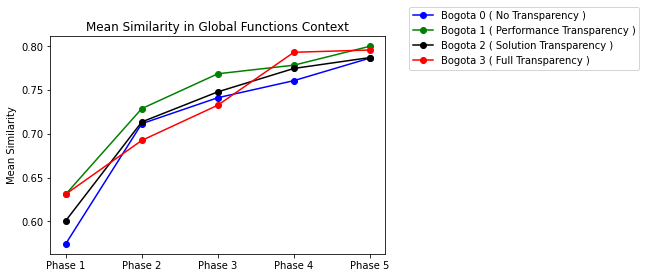

In [115]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [global_bogota0_phase1_mean, global_bogota0_phase2_mean, global_bogota0_phase3_mean, global_bogota0_phase4_mean, global_bogota0_phase5_mean]
y2 = [global_bogota1_phase1_mean, global_bogota1_phase2_mean, global_bogota1_phase3_mean, global_bogota1_phase4_mean, global_bogota1_phase5_mean]
y3 = [global_bogota2_phase1_mean, global_bogota2_phase2_mean, global_bogota2_phase3_mean, global_bogota2_phase4_mean, global_bogota2_phase5_mean]
y4 = [global_bogota3_phase1_mean, global_bogota3_phase2_mean, global_bogota3_phase3_mean, global_bogota3_phase4_mean, global_bogota3_phase5_mean]


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Similarity in Global Functions Context")
plt.ylabel("Mean Similarity")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

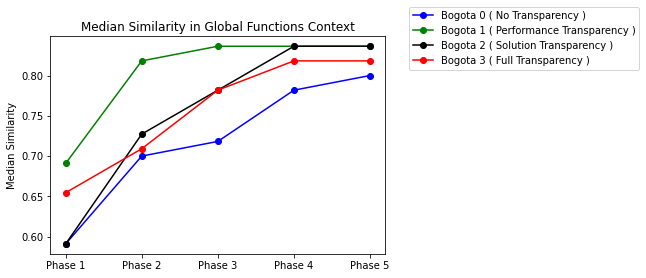

In [116]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [global_bogota0_phase1_median, global_bogota0_phase2_median, global_bogota0_phase3_median, global_bogota0_phase4_median, global_bogota0_phase5_median]
y2 = [global_bogota1_phase1_median, global_bogota1_phase2_median, global_bogota1_phase3_median, global_bogota1_phase4_median, global_bogota1_phase5_median]
y3 = [global_bogota2_phase1_median, global_bogota2_phase2_median, global_bogota2_phase3_median, global_bogota2_phase4_median, global_bogota2_phase5_median]
y4 = [global_bogota3_phase1_median, global_bogota3_phase2_median, global_bogota3_phase3_median, global_bogota3_phase4_median, global_bogota3_phase5_median]



x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Median Similarity in Global Functions Context")
plt.ylabel("Median Similarity")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

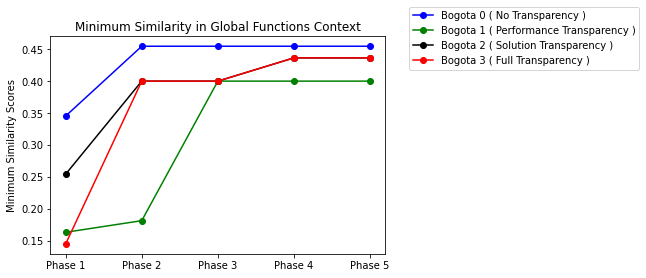

In [117]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [global_bogota0_phase1_min, global_bogota0_phase2_min, global_bogota0_phase3_min, global_bogota0_phase4_min, global_bogota0_phase5_min ]
y2 = [global_bogota1_phase1_min, global_bogota1_phase2_min, global_bogota1_phase3_min, global_bogota1_phase4_min, global_bogota1_phase5_min]
y3 = [global_bogota2_phase1_min, global_bogota2_phase2_min, global_bogota2_phase3_min, global_bogota2_phase4_min, global_bogota2_phase5_min ]
y4 = [global_bogota3_phase1_min, global_bogota3_phase2_min, global_bogota3_phase3_min, global_bogota3_phase4_min, global_bogota3_phase5_min]



x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Minimum Similarity in Global Functions Context")
plt.ylabel("Minimum Similarity Scores")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [118]:
df0_1 = subset_bogota0_phase1_all_only.rename(columns={'similarity':'b0-p1-similarity'}, inplace=False)
df0_2 = subset_bogota0_phase2_all_only.rename(columns={'similarity':'b0-p2-similarity'}, inplace=False)
df0_3 = subset_bogota0_phase3_all_only.rename(columns={'similarity':'b0-p3-similarity'}, inplace=False)
df0_4 = subset_bogota0_phase4_all_only.rename(columns={'similarity':'b0-p4-similarity'}, inplace=False)
df0_5 = subset_bogota0_phase5_all_only.rename(columns={'similarity':'b0-p5-similarity'}, inplace=False)

from functools import reduce

df0_merged_original = reduce(lambda x,y: pd.merge(x,y, on='user1', how='outer'), [df0_1, df0_2, df0_3, df0_4, df0_5])

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1214607353.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'user2_x'} in the result is deprecated and will raise a MergeError in a future version.
  df0_merged_original = reduce(lambda x,y: pd.merge(x,y, on='user1', how='outer'), [df0_1, df0_2, df0_3, df0_4, df0_5])


/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

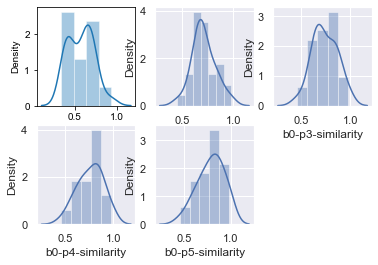

In [119]:
subset = df0_merged_original[["b0-p1-similarity", "b0-p2-similarity", "b0-p3-similarity", "b0-p4-similarity", "b0-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b0_o=[]
mean_list_b0_o=[]
min_list_b0_o=[]
max_list_b0_o=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b0_o.append(subset[column].describe().loc['50%'])
    mean_list_b0_o.append(subset[column].describe().loc['mean'])
    min_list_b0_o.append(subset[column].describe().loc['min'])
    max_list_b0_o.append(subset[column].describe().loc['max'])

In [120]:
df0_merged = df0_merged_original[["b0-p1-similarity", "b0-p2-similarity", "b0-p3-similarity", "b0-p4-similarity", "b0-p5-similarity"]].apply(np.log)
df0_merged

b0-p1-similarity  b0-p2-similarity  b0-p3-similarity  b0-p4-similarity  \
0          -0.480973         -0.480973         -0.480973         -0.246133   
1          -0.871839         -0.423814         -0.018349         -0.018349   
2          -1.062894         -0.396415         -0.396415         -0.018349   
3          -0.396415         -0.223144         -0.178692         -0.157186   
4          -0.962811         -0.369747         -0.246133         -0.200671   
5          -0.246133         -0.246133         -0.246133         -0.200671   
6          -0.396415         -0.343772         -0.246133         -0.246133   
7          -0.423814         -0.423814         -0.343772         -0.318454   
8          -0.916291         -0.178692         -0.136132         -0.136132   
9          -0.606136         -0.606136         -0.606136         -0.606136   
10         -0.396415         -0.423814         -0.423814         -0.423814   
11         -0.829279         -0.396415         -0.396415         -0.541597   
12         -0.916291         -0.788457         -0.788457         -0.788457   
13         -0.293761         -0.178692         -0.136132         -0.136132   
14         -0.369747         -0.369747         -0.343772         -0.343772   
15         -0.075508         -0.075508         -0.541597         -0.541597   
16         -0.510826         -0.136132         -0.095310         -0.095310   
17         -0.871839         -0.573346         -0.136132         -0.136132   
18         -0.573346         -0.318454         -0.293761         -0.223144   
19         -0.541597         -0.451985         -0.451985         -0.451985   
20         -0.788457         -0.451985         -0.451985         -0.246133   
21         -0.343772         -0.318454         -0.178692         -0.178692   
22         -0.423814         -0.269664         -0.157186         -0.136132   
23         -0.916291         -0.318454         -0.318454         -0.318454   
24         -0.343772         -0.343772         -0.343772         -0.343772   
25         -0.749237         -0.510826         -0.480973         -0.369747   
26               NaN         -0.018349         -0.018349         -0.018349   
27               NaN         -0.343772         -0.396415         -0.396415   
28               NaN         -0.423814         -0.423814         -0.423814   
29               NaN         -0.178692         -0.157186         -0.157186   
30               NaN               NaN               NaN         -0.573346   

    b0-p5-similarity  
0          -0.246133  
1          -0.018349  
2          -0.018349  
3          -0.115513  
4          -0.200671  
5          -0.200671  
6          -0.223144  
7          -0.269664  
8          -0.136132  
9          -0.606136  
10         -0.423814  
11         -0.541597  
12         -0.788457  
13         -0.136132  
14         -0.343772  
15         -0.541597  
16         -0.095310  
17         -0.136132  
18         -0.246133  
19         -0.451985  
20         -0.269664  
21         -0.157186  
22         -0.136132  
23         -0.318454  
24         -0.343772  
25         -0.018349  
26         -0.018349  
27         -0.369747  
28         -0.423814  
29         -0.157186  
30         -0.018349

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

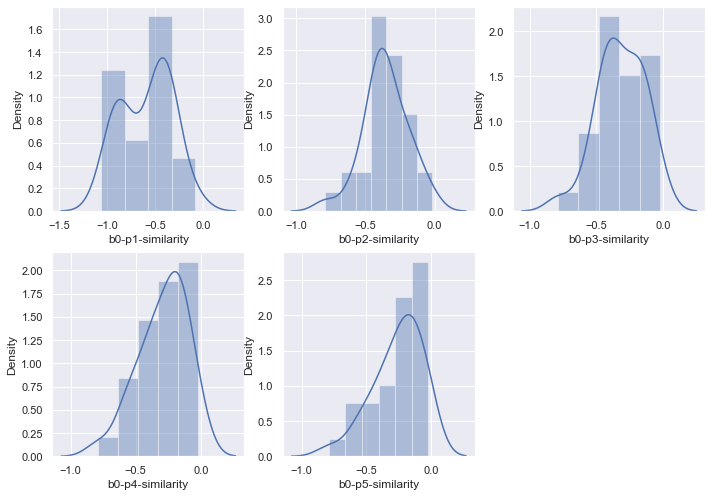

In [121]:
subset = df0_merged[["b0-p1-similarity", "b0-p2-similarity", "b0-p3-similarity", "b0-p4-similarity", "b0-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b0=[]
mean_list_b0=[]
min_list_b0=[]
max_list_b0=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b0.append(subset[column].describe().loc['50%'])
    mean_list_b0.append(subset[column].describe().loc['mean'])
    min_list_b0.append(subset[column].describe().loc['min'])
    max_list_b0.append(subset[column].describe().loc['max'])

In [122]:
from functools import reduce
b1_p1 = subset_bogota1_phase1_all_only.rename(columns = {'similarity':'b1-p1-similarity'}, inplace = False)
b1_p2 = subset_bogota1_phase2_all_only.rename(columns = {'similarity':'b1-p2-similarity'}, inplace = False)
b1_p3 = subset_bogota1_phase3_all_only.rename(columns = {'similarity':'b1-p3-similarity'}, inplace = False)
b1_p4 = subset_bogota1_phase4_all_only.rename(columns = {'similarity':'b1-p4-similarity'}, inplace = False)
b1_p5 = subset_bogota1_phase5_all_only.rename(columns = {'similarity':'b1-p5-similarity'}, inplace = False)
data_frames = [b1_p1, b1_p2, b1_p3, b1_p4, b1_p5]
df1_merged_original = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='outer'), data_frames)

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/3881555396.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'user2_x'} in the result is deprecated and will raise a MergeError in a future version.
  df1_merged_original = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='outer'), data_frames)


/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

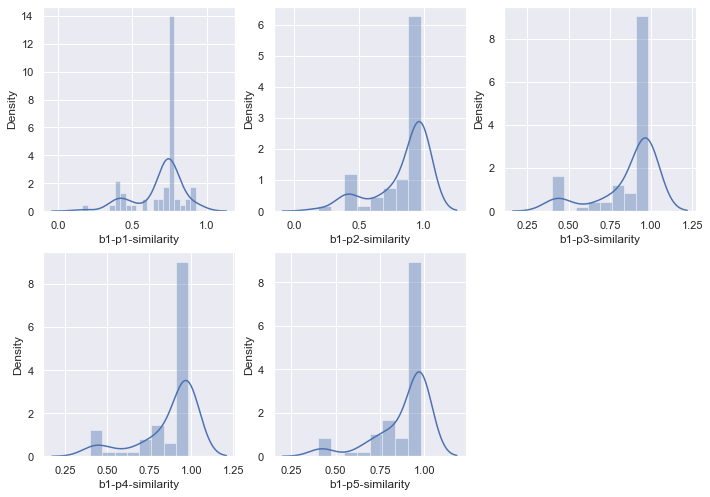

In [123]:
subset = df1_merged_original[["b1-p1-similarity", "b1-p2-similarity", "b1-p3-similarity", "b1-p4-similarity", "b1-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b1_o=[]
mean_list_b1_o=[]
max_list_b1_o=[]
min_list_b1_o=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b1_o.append(subset[column].describe().loc['50%'])
    mean_list_b1_o.append(subset[column].describe().loc['mean'])
    max_list_b1_o.append(subset[column].describe().loc['max'])
    min_list_b1_o.append(subset[column].describe().loc['min'])

In [124]:
df1_merged = df1_merged_original[["b1-p1-similarity", "b1-p2-similarity", "b1-p3-similarity", "b1-p4-similarity", "b1-p5-similarity"]].apply(np.log)
df1_merged

b1-p1-similarity  b1-p2-similarity  b1-p3-similarity  b1-p4-similarity  \
0          -0.573346         -0.573346         -0.223144         -0.223144   
1          -0.916291         -0.916291         -0.916291         -0.916291   
2          -0.916291         -0.916291         -0.318454         -0.318454   
3          -0.829279         -0.541597         -0.541597         -0.343772   
4          -0.916291         -0.916291         -0.916291         -0.916291   
..               ...               ...               ...               ...   
62         -0.829279         -0.343772         -0.318454         -0.318454   
63               NaN         -0.829279         -0.829279         -0.829279   
64               NaN         -0.178692         -0.178692         -0.178692   
65               NaN         -0.871839         -0.871839         -0.451985   
66               NaN         -0.423814         -0.423814         -0.369747   

    b1-p5-similarity  
0          -0.223144  
1          -0.916291  
2          -0.318454  
3          -0.343772  
4          -0.916291  
..               ...  
62         -0.246133  
63         -0.829279  
64         -0.178692  
65         -0.369747  
66         -0.318454  

[67 rows x 5 columns]

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

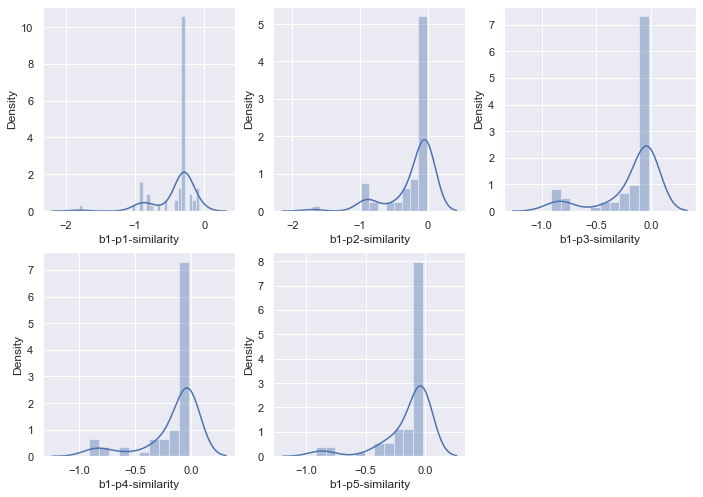

In [125]:
subset = df1_merged[["b1-p1-similarity", "b1-p2-similarity", "b1-p3-similarity", "b1-p4-similarity", "b1-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b1=[]
mean_list_b1=[]
max_list_b1=[]
min_list_b1=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b1.append(subset[column].describe().loc['50%'])
    mean_list_b1.append(subset[column].describe().loc['mean'])
    max_list_b1.append(subset[column].describe().loc['max'])
    min_list_b1.append(subset[column].describe().loc['min'])

In [126]:
from functools import reduce
b2_p1 = subset_bogota2_phase1_all_only.rename(columns = {'similarity':'b2-p1-similarity'}, inplace = False)
b2_p2 = subset_bogota2_phase2_all_only.rename(columns = {'similarity':'b2-p2-similarity'}, inplace = False)
b2_p3 = subset_bogota2_phase3_all_only.rename(columns = {'similarity':'b2-p3-similarity'}, inplace = False)
b2_p4 = subset_bogota2_phase4_all_only.rename(columns = {'similarity':'b2-p4-similarity'}, inplace = False)
b2_p5 = subset_bogota2_phase5_all_only.rename(columns = {'similarity':'b2-p5-similarity'}, inplace = False)
data_frames = [b2_p1, b2_p2, b2_p3, b2_p4, b2_p5]
df2_merged_original = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='outer'), data_frames)


/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/1132933561.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'user2_x'} in the result is deprecated and will raise a MergeError in a future version.
  df2_merged_original = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='outer'), data_frames)


/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

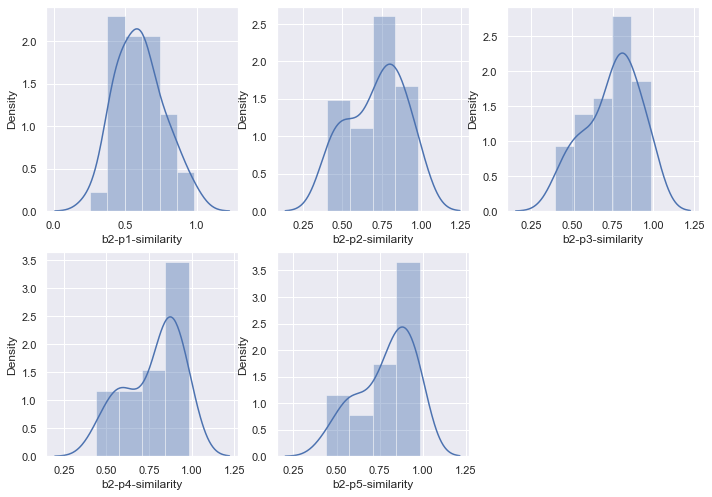

In [127]:
subset = df2_merged_original[["b2-p1-similarity", "b2-p2-similarity", "b2-p3-similarity", "b2-p4-similarity", "b2-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b2_o=[]
mean_list_b2_o=[]
min_list_b2_o=[]
max_list_b2_o=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b2_o.append(subset[column].describe().loc['50%'])
    mean_list_b2_o.append(subset[column].describe().loc['mean'])
    min_list_b2_o.append(subset[column].describe().loc['min'])
    max_list_b2_o.append(subset[column].describe().loc['max'])

In [128]:
df2_merged = df2_merged_original[["b2-p1-similarity", "b2-p2-similarity", "b2-p3-similarity", "b2-p4-similarity", "b2-p5-similarity"]].apply(np.log)
df2_merged

b2-p1-similarity  b2-p2-similarity  b2-p3-similarity  b2-p4-similarity  \
0          -0.606136         -0.606136         -0.018349         -0.018349   
1          -0.916291         -0.916291         -0.606136         -0.606136   
2          -0.829279         -0.829279         -0.829279         -0.829279   
3          -0.157186         -0.157186         -0.157186         -0.157186   
4          -0.788457         -0.711496         -0.640037         -0.640037   
5          -0.178692         -0.178692         -0.178692         -0.095310   
6          -0.200671         -0.200671         -0.200671         -0.200671   
7          -0.269664         -0.269664         -0.269664         -0.269664   
8          -0.916291         -0.871839         -0.369747         -0.369747   
9          -0.075508         -0.075508         -0.075508         -0.075508   
10         -0.711496         -0.136132         -0.136132         -0.075508   
11         -0.510826         -0.293761         -0.223144         -0.157186   
12         -0.480973         -0.369747         -0.318454         -0.136132   
13         -1.368276         -0.788457         -0.788457         -0.788457   
14         -0.318454         -0.018349         -0.018349         -0.018349   
15         -0.541597         -0.178692         -0.246133         -0.178692   
16         -0.675129         -0.178692         -0.157186         -0.136132   
17         -0.916291         -0.916291         -0.916291         -0.711496   
18         -0.423814         -0.343772         -0.343772         -0.343772   
19         -0.541597         -0.510826         -0.510826         -0.510826   
20         -0.573346         -0.396415         -0.246133         -0.157186   
21         -0.451985         -0.541597         -0.541597         -0.541597   
22         -0.962811         -0.640037         -0.480973         -0.510826   
23         -0.541597         -0.018349         -0.018349         -0.018349   
24         -0.749237         -0.606136         -0.606136         -0.573346   
25         -0.871839         -0.318454         -0.293761         -0.510826   
26         -0.423814         -0.423814         -0.423814         -0.423814   
27         -0.018349         -0.018349         -0.018349         -0.018349   
28         -0.480973         -0.095310         -0.095310         -0.095310   
29         -0.318454         -0.318454         -0.293761         -0.178692   
30         -0.396415         -0.200671         -0.178692         -0.136132   
31         -0.510826         -0.157186         -0.157186         -0.157186   
32         -0.369747         -0.246133         -0.223144         -0.223144   
33         -0.675129         -0.018349         -0.018349         -0.018349   
34         -0.223144         -0.200671         -0.157186         -0.095310   
35         -0.788457         -0.318454         -0.293761         -0.318454   
36               NaN         -0.711496         -0.711496         -0.223144   
37               NaN               NaN               NaN         -0.136132   

    b2-p5-similarity  
0          -0.018349  
1          -0.606136  
2          -0.829279  
3          -0.157186  
4          -0.640037  
5          -0.095310  
6          -0.200671  
7          -0.269664  
8          -0.269664  
9          -0.075508  
10         -0.075508  
11         -0.157186  
12         -0.136132  
13         -0.788457  
14         -0.018349  
15         -0.223144  
16         -0.136132  
17         -0.573346  
18         -0.343772  
19         -0.510826  
20         -0.157186  
21         -0.451985  
22         -0.343772  
23         -0.018349  
24         -0.573346  
25         -0.510826  
26         -0.423814  
27         -0.018349  
28         -0.095310  
29         -0.018349  
30         -0.115513  
31         -0.157186  
32         -0.223144  
33         -0.018349  
34         -0.056089  
35         -0.318454  
36         -0.223144  
37         -0.136132

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

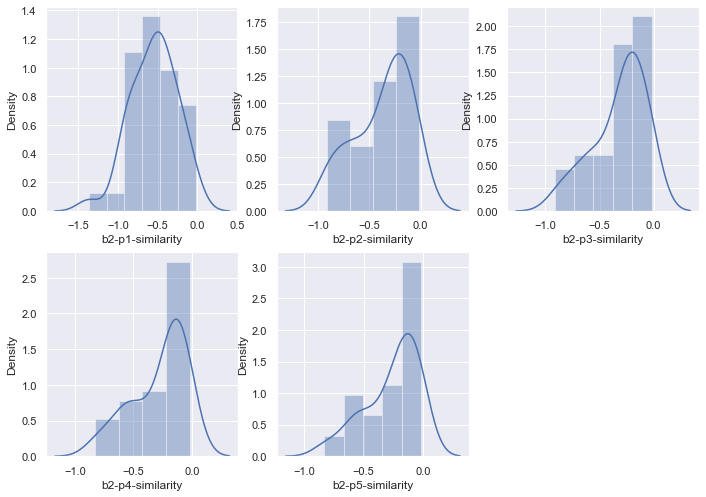

In [129]:
subset = df2_merged[["b2-p1-similarity", "b2-p2-similarity", "b2-p3-similarity", "b2-p4-similarity", "b2-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b2=[]
mean_list_b2=[]
min_list_b2=[]
max_list_b2=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b2.append(subset[column].describe().loc['50%'])
    mean_list_b2.append(subset[column].describe().loc['mean'])
    min_list_b2.append(subset[column].describe().loc['min'])
    max_list_b2.append(subset[column].describe().loc['max'])

In [132]:
from functools import reduce
b3_p1 = subset_bogota3_phase1_all_only.rename(columns = {'similarity':'b3-p1-similarity'}, inplace = False)
b3_p2 = overall_phase2_bogota3_all_only.rename(columns = {'similarity':'b3-p2-similarity'}, inplace = False)
b3_p3 = subset_bogota3_phase3_all_only.rename(columns = {'similarity':'b3-p3-similarity'}, inplace = False)
b3_p4 = overall_phase4_bogota3_all_only.rename(columns = {'similarity':'b3-p4-similarity'}, inplace = False)
b3_p5 = overall_phase5_bogota3_all_only.rename(columns = {'similarity':'b3-p5-similarity'}, inplace = False)
data_frames = [b3_p1, b3_p2, b3_p3, b3_p4, b3_p5]
df3_merged_original = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='outer'), data_frames)

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_3767/2153003912.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'user2_x'} in the result is deprecated and will raise a MergeError in a future version.
  df3_merged_original = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='outer'), data_frames)


/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

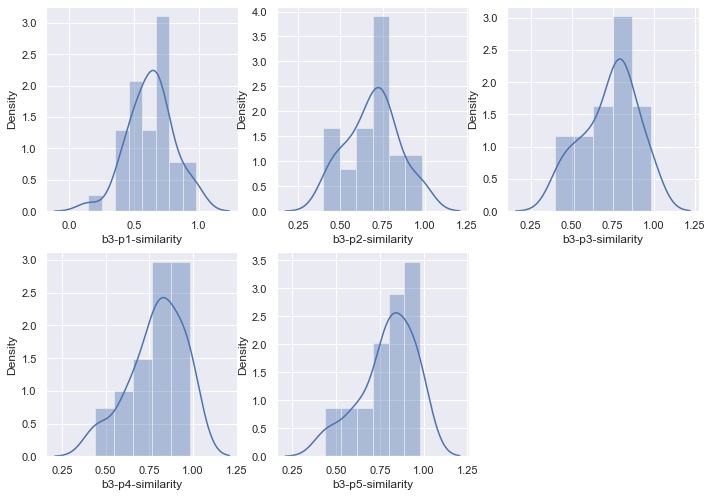

In [133]:
subset = df3_merged_original[["b3-p1-similarity", "b3-p2-similarity", "b3-p3-similarity", "b3-p4-similarity", "b3-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b3_o=[]
mean_list_b3_o=[]
min_list_b3_o=[]
max_list_b3_o=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b3_o.append(subset[column].describe().loc['50%'])
    mean_list_b3_o.append(subset[column].describe().loc['mean'])
    max_list_b3_o.append(subset[column].describe().loc['max'])
    min_list_b3_o.append(subset[column].describe().loc['min'])

In [134]:
df3_merged = df3_merged_original[["b3-p1-similarity", "b3-p2-similarity", "b3-p3-similarity", "b3-p4-similarity", "b3-p5-similarity"]].apply(np.log)
df3_merged

b3-p1-similarity  b3-p2-similarity  b3-p3-similarity  b3-p4-similarity  \
0          -0.962811         -0.573346         -0.573346         -0.396415   
1          -0.423814         -0.157186         -0.018349         -0.018349   
2          -0.396415         -0.200671         -0.200671         -0.200671   
3          -0.157186         -0.018349         -0.018349         -0.018349   
4          -0.018349         -0.018349         -0.018349         -0.018349   
5          -0.480973         -0.269664         -0.178692         -0.178692   
6          -0.157186         -0.451985         -0.451985         -0.451985   
7          -0.396415         -0.318454         -0.223144         -0.293761   
8          -0.606136         -0.200671         -0.157186         -0.200671   
9          -0.871839         -0.788457         -0.788457         -0.788457   
10         -1.927892               NaN               NaN               NaN   
11         -0.480973         -0.343772         -0.200671         -0.157186   
12         -0.396415         -0.369747         -0.246133         -0.178692   
13         -0.246133         -0.749237         -0.749237         -0.246133   
14         -0.788457         -0.788457         -0.788457         -0.788457   
15         -0.269664         -0.343772         -0.095310         -0.095310   
16         -0.293761         -0.246133         -0.246133         -0.018349   
17         -0.640037         -0.178692         -0.178692         -0.075508   
18         -0.640037         -0.423814         -0.246133         -0.223144   
19         -0.675129         -0.318454         -0.318454         -0.018349   
20         -0.640037         -0.640037         -0.246133         -0.056089   
21         -0.396415         -0.396415         -0.423814         -0.423814   
22         -0.480973         -0.573346         -0.573346         -0.541597   
23         -0.749237         -0.510826         -0.510826         -0.510826   
24         -0.269664         -0.269664         -0.200671         -0.200671   
25         -0.606136         -0.318454         -0.318454         -0.293761   
26         -0.018349         -0.018349         -0.018349         -0.018349   
27         -0.343772         -0.246133         -0.246133         -0.200671   
28         -0.396415         -0.269664         -0.223144         -0.223144   
29         -1.011601         -0.916291         -0.916291         -0.451985   
30         -0.369747         -0.369747         -0.369747         -0.318454   
31         -0.829279         -0.829279         -0.829279         -0.829279   
32         -0.573346         -0.510826         -0.343772         -0.318454   
33         -0.343772         -0.293761         -0.293761         -0.246133   
34         -0.075508         -0.711496         -0.606136         -0.157186   
35         -0.510826         -0.510826         -0.510826         -0.018349   
36         -0.369747         -0.343772         -0.136132         -0.136132   
37               NaN         -0.075508         -0.075508         -0.075508   

    b3-p5-similarity  
0          -0.396415  
1          -0.018349  
2          -0.200671  
3          -0.018349  
4          -0.018349  
5          -0.018349  
6          -0.451985  
7          -0.293761  
8          -0.200671  
9          -0.788457  
10         -0.541597  
11         -0.157186  
12         -0.157186  
13         -0.246133  
14         -0.788457  
15         -0.075508  
16         -0.018349  
17         -0.075508  
18         -0.136132  
19         -0.223144  
20         -0.056089  
21         -0.423814  
22         -0.541597  
23         -0.510826  
24         -0.200671  
25         -0.269664  
26         -0.018349  
27         -0.157186  
28         -0.269664  
29         -0.223144  
30         -0.246133  
31         -0.829279  
32         -0.269664  
33         -0.246133  
34         -0.157186  
35         -0.075508  
36         -0.115513  
37         -0.075508

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

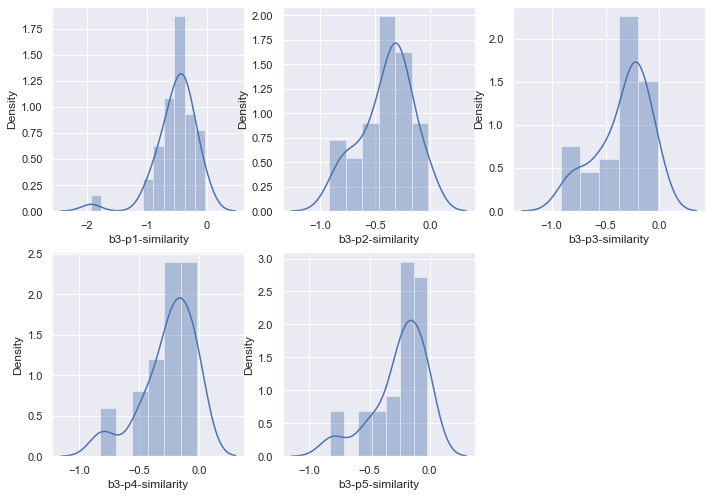

In [135]:
subset = df3_merged[["b3-p1-similarity", "b3-p2-similarity", "b3-p3-similarity", "b3-p4-similarity", "b3-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b3=[]
mean_list_b3=[]
min_list_b3=[]
max_list_b3=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b3.append(subset[column].describe().loc['50%'])
    mean_list_b3.append(subset[column].describe().loc['mean'])
    max_list_b3.append(subset[column].describe().loc['max'])
    min_list_b3.append(subset[column].describe().loc['min'])

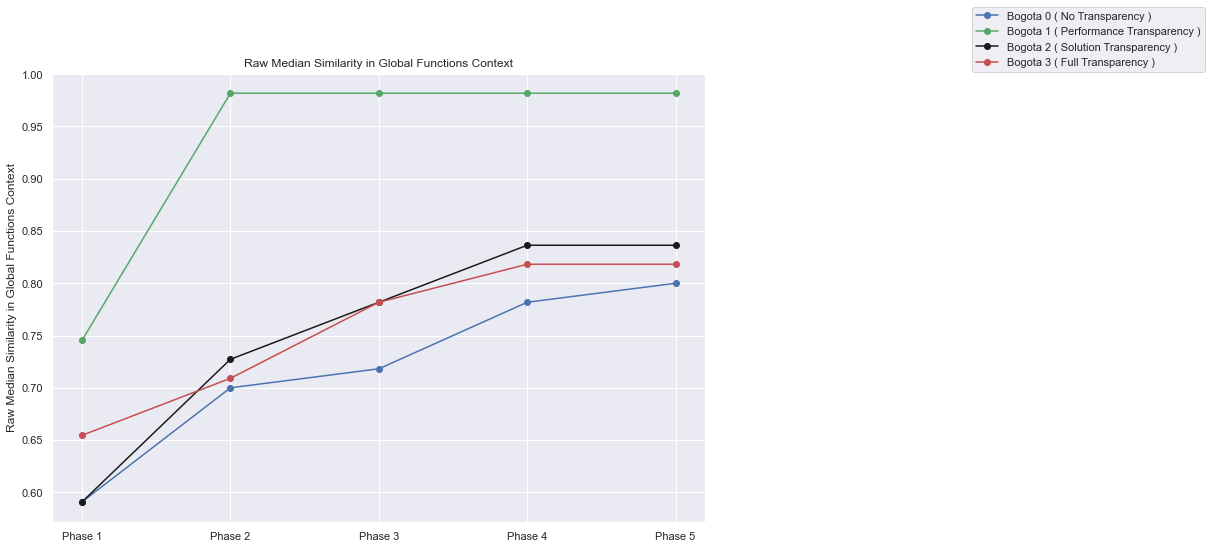

In [141]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_list_b0_o
y2 = median_list_b1_o
y3 = median_list_b2_o
y4 = median_list_b3_o


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Raw Median Similarity in Global Functions Context")
plt.ylabel("Raw Median Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

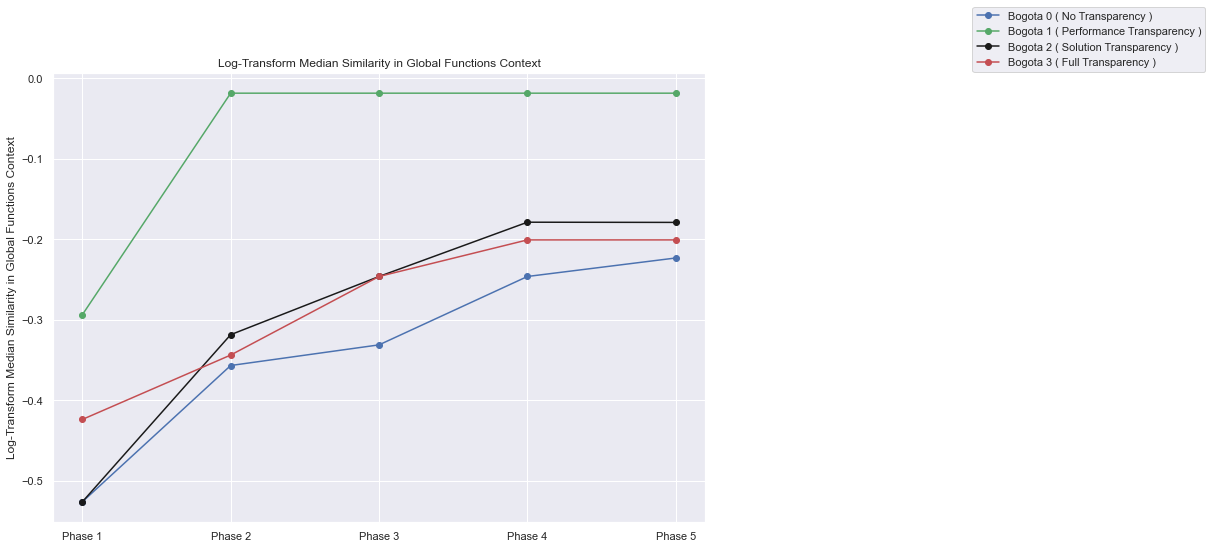

In [136]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_list_b0
y2 = median_list_b1
y3 = median_list_b2
y4 = median_list_b3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Median Similarity in Global Functions Context")
plt.ylabel("Log-Transform Median Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

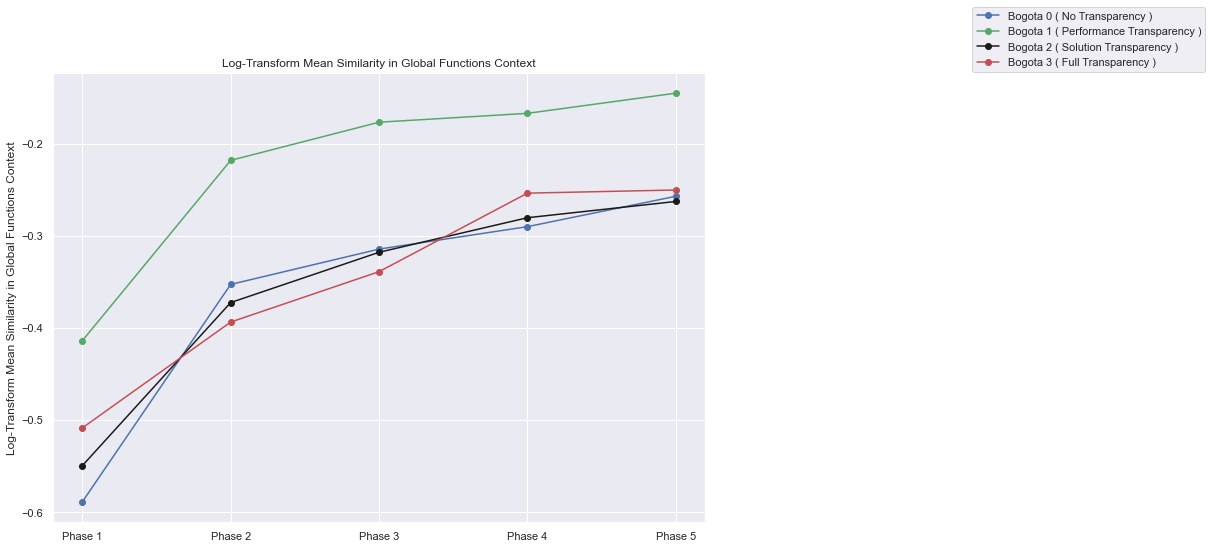

In [137]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_list_b0
y2 = mean_list_b1
y3 = mean_list_b2
y4 = mean_list_b3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Mean Similarity in Global Functions Context")
plt.ylabel("Log-Transform Mean Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

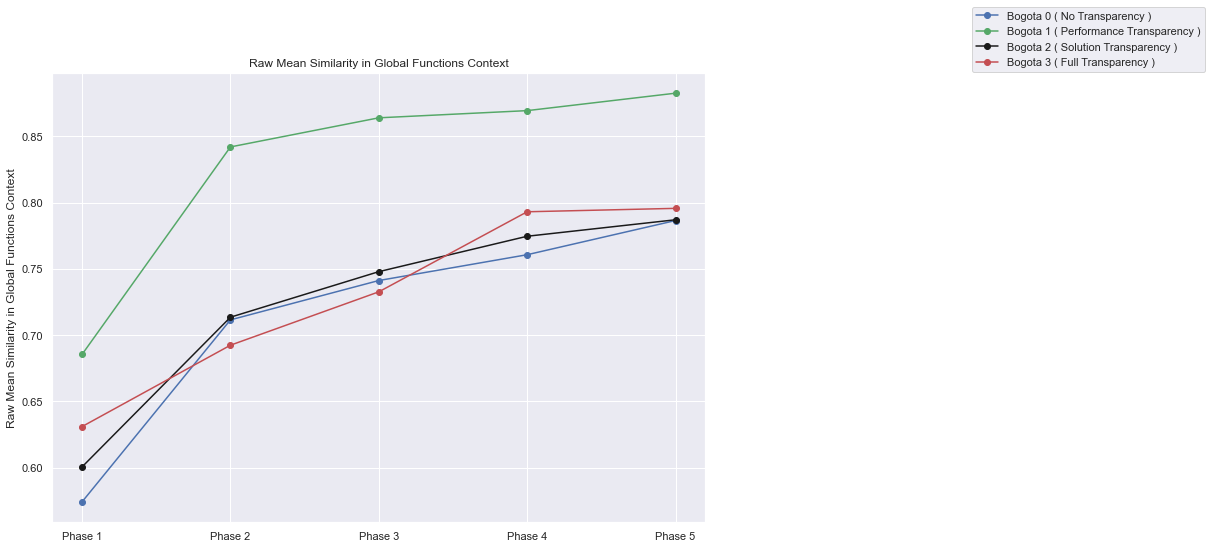

In [138]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_list_b0_o
y2 = mean_list_b1_o
y3 = mean_list_b2_o
y4 = mean_list_b3_o


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Raw Mean Similarity in Global Functions Context")
plt.ylabel("Raw Mean Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

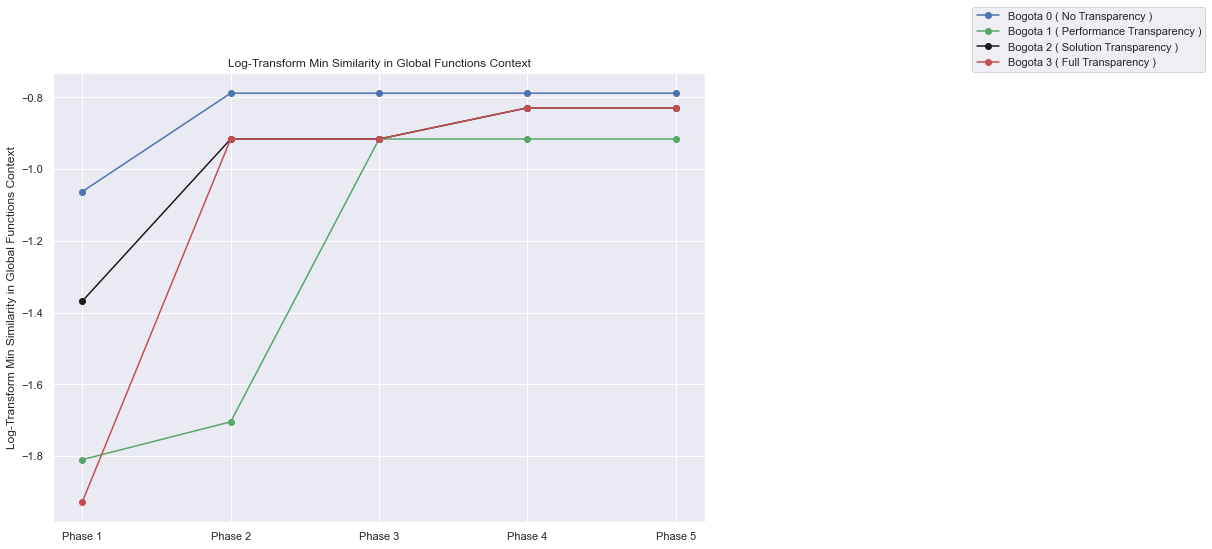

In [139]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = min_list_b0
y2 = min_list_b1
y3 = min_list_b2
y4 = min_list_b3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Min Similarity in Global Functions Context")
plt.ylabel("Log-Transform Min Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = max_list_b0
y2 = max_list_b1
y3 = max_list_b2
y4 = max_list_b3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Max Similarity in Global Functions Context")
plt.ylabel("Log-Transform Max Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Calculate the uniqueness measure based on Uzzi's and Sio's paper. [ Have to be Read ]

Atypical combinations and scientific impact by Uzzi 

Take the whole sample of functions and identify the most common and the least common functions based on the 90% most common and 10% least common functions. Explore in which group they occur and which phase. 

In [ ]:
overall_45_functions = overall_45['functions'].to_list()
overall_45_functions

In [ ]:
## 20,000. most unique functions 
new_list

## Phase 5

In [ ]:
listed = overall_phase5_bogota3['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota3_phase5 = joined_string.split(",")
bogota3_phase5

In [ ]:
unique_bogota3_phase5 = list(set(bogota3_phase5).intersection(set(new_list)))
len_unique_bogota3_phase5 = len(unique_bogota3_phase5)

In [ ]:
unique_bogota3_phase5 = list(set(bogota3_phase5).intersection(set(top_5_unique)))
top_5_unique_bogota3_phase5 = len(unique_bogota3_phase5)

In [ ]:
unique_bogota3_phase5 = list(set(bogota3_phase5).intersection(set(top_10_unique)))
top_10_unique_bogota3_phase5  = len(unique_bogota3_phase5)

In [ ]:
unique_bogota3_phase5 = list(set(bogota3_phase5).intersection(set(top_15_unique)))
top_15_unique_bogota3_phase5  = len(unique_bogota3_phase5)

In [ ]:
unique_bogota3_phase5 = list(set(bogota3_phase5).intersection(set(top_20_unique)))
top_20_unique_bogota3_phase5  = len(unique_bogota3_phase5)

In [ ]:
listed = overall_phase5_bogota1['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota1_phase5 = joined_string.split(",")
bogota1_phase5

In [ ]:
unique_bogota1_phase5 = list(set(bogota1_phase5).intersection(set(new_list)))
len_unique_bogota1_phase5 = len(unique_bogota1_phase5)

In [ ]:
unique_bogota1_phase5 = list(set(bogota1_phase5).intersection(set(top_5_unique)))
top_5_unique_bogota1_phase5 = len(unique_bogota1_phase5)

In [ ]:
unique_bogota1_phase5 = list(set(bogota1_phase5).intersection(set(top_10_unique)))
top_10_unique_bogota1_phase5 = len(unique_bogota1_phase5)

In [ ]:
unique_bogota1_phase5 = list(set(bogota1_phase5).intersection(set(top_15_unique)))
top_15_unique_bogota1_phase5 = len(unique_bogota1_phase5)

In [ ]:
unique_bogota1_phase5 = list(set(bogota1_phase5).intersection(set(top_20_unique)))
top_20_unique_bogota1_phase5 = len(unique_bogota1_phase5)

In [ ]:
listed = overall_phase5_bogota2['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota2_phase5 = joined_string.split(",")
bogota2_phase5

In [ ]:
unique_bogota2_phase5 = list(set(bogota2_phase5).intersection(set(new_list)))
len_unique_bogota2_phase5 = len(unique_bogota2_phase5)

In [ ]:
unique_bogota2_phase5 = list(set(bogota2_phase5).intersection(set(top_5_unique)))
top_5_unique_bogota2_phase5 = len(unique_bogota2_phase5)

In [ ]:
unique_bogota2_phase5 = list(set(bogota2_phase5).intersection(set(top_10_unique)))
top_10_unique_bogota2_phase5 = len(unique_bogota2_phase5)

In [ ]:
unique_bogota2_phase5 = list(set(bogota2_phase5).intersection(set(top_15_unique)))
top_15_unique_bogota2_phase5 = len(unique_bogota2_phase5)

In [ ]:
unique_bogota2_phase5 = list(set(bogota2_phase5).intersection(set(top_20_unique)))
top_20_unique_bogota2_phase5 = len(unique_bogota2_phase5)

In [ ]:
listed = overall_phase5_bogota0['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota0_phase5 = joined_string.split(",")
bogota0_phase5

In [ ]:
unique_bogota0_phase5 = list(set(bogota0_phase5).intersection(set(new_list)))
len_unique_bogota0_phase5 = len(unique_bogota0_phase5)

In [ ]:
unique_bogota0_phase5 = list(set(bogota0_phase5).intersection(set(top_5_unique)))
top_5_unique_bogota0_phase5 = len(unique_bogota0_phase5)

In [ ]:
unique_bogota0_phase5 = list(set(bogota0_phase5).intersection(set(top_10_unique)))
top_10_unique_bogota0_phase5 = len(unique_bogota0_phase5)

In [ ]:
unique_bogota0_phase5 = list(set(bogota0_phase5).intersection(set(top_15_unique)))
top_15_unique_bogota0_phase5 = len(unique_bogota0_phase5)

In [ ]:
unique_bogota0_phase5 = list(set(bogota0_phase5).intersection(set(top_20_unique)))
top_20_unique_bogota0_phase5 = len(unique_bogota0_phase5)

## Phase 4

In [ ]:
listed = overall_phase4_bogota3['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota3_phase4 = joined_string.split(",")


In [ ]:
listed = overall_phase4_bogota2['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota2_phase4 = joined_string.split(",")


In [ ]:
listed = overall_phase4_bogota1['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota1_phase4 = joined_string.split(",")


In [ ]:
listed = overall_phase4_bogota0['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota0_phase4 = joined_string.split(",")


In [ ]:
unique_bogota3_phase4 = list(set(bogota3_phase4).intersection(set(new_list)))
len_unique_bogota3_phase4 = len(unique_bogota3_phase4)

In [ ]:
unique_bogota3_phase4 = list(set(bogota3_phase4).intersection(set(top_5_unique)))
top_5_unique_bogota3_phase4 = len(unique_bogota3_phase4)

In [ ]:
unique_bogota3_phase4 = list(set(bogota3_phase4).intersection(set(top_10_unique)))
top_10_unique_bogota3_phase4 = len(unique_bogota3_phase4)

In [ ]:
unique_bogota3_phase4 = list(set(bogota3_phase4).intersection(set(top_15_unique)))
top_15_unique_bogota3_phase4 = len(unique_bogota3_phase4)

In [ ]:
unique_bogota3_phase4 = list(set(bogota3_phase4).intersection(set(top_20_unique)))
top_20_unique_bogota3_phase4 = len(unique_bogota3_phase4)

In [ ]:
unique_bogota2_phase4 = list(set(bogota2_phase4).intersection(set(new_list)))
len_unique_bogota2_phase4 = len(unique_bogota2_phase4)

In [ ]:
unique_bogota2_phase4 = list(set(bogota2_phase4).intersection(set(new_list)))
len_unique_bogota2_phase4 = len(unique_bogota2_phase4)

In [ ]:
unique_bogota2_phase4 = list(set(bogota2_phase4).intersection(set(top_5_unique)))
top_5_unique_bogota2_phase4 = len(unique_bogota2_phase4)

In [ ]:
unique_bogota2_phase4 = list(set(bogota2_phase4).intersection(set(top_10_unique)))
top_10_unique_bogota2_phase4 = len(unique_bogota2_phase4)

In [ ]:
unique_bogota2_phase4 = list(set(bogota2_phase4).intersection(set(top_15_unique)))
top_15_unique_bogota2_phase4 = len(unique_bogota2_phase4)

In [ ]:
unique_bogota2_phase4 = list(set(bogota2_phase4).intersection(set(top_20_unique)))
top_20_unique_bogota2_phase4 = len(unique_bogota2_phase4)

In [ ]:
unique_bogota1_phase4 = list(set(bogota1_phase4).intersection(set(new_list)))
len_unique_bogota1_phase4 = len(unique_bogota1_phase4)

In [ ]:
unique_bogota1_phase4 = list(set(bogota1_phase4).intersection(set(top_5_unique)))
top_5_unique_bogota1_phase4 = len(unique_bogota1_phase4)

In [ ]:
unique_bogota1_phase4 = list(set(bogota1_phase4).intersection(set(top_10_unique)))
top_10_unique_bogota1_phase4 = len(unique_bogota1_phase4)

In [ ]:
unique_bogota1_phase4 = list(set(bogota1_phase4).intersection(set(top_15_unique)))
top_15_unique_bogota1_phase4 = len(unique_bogota1_phase4)

In [ ]:
unique_bogota1_phase4 = list(set(bogota1_phase4).intersection(set(top_20_unique)))
top_20_unique_bogota1_phase4 = len(unique_bogota1_phase4)

In [ ]:
unique_bogota0_phase4 = list(set(bogota0_phase4).intersection(set(new_list)))
len_unique_bogota0_phase4 = len(unique_bogota0_phase4)

In [ ]:
unique_bogota0_phase4 = list(set(bogota0_phase4).intersection(set(top_5_unique)))
top_5_unique_bogota0_phase4 = len(unique_bogota0_phase4)

In [ ]:
unique_bogota0_phase4 = list(set(bogota0_phase4).intersection(set(top_10_unique)))
top_10_unique_bogota0_phase4 = len(unique_bogota0_phase4)

In [ ]:
unique_bogota0_phase4 = list(set(bogota0_phase4).intersection(set(top_15_unique)))
top_15_unique_bogota0_phase4 = len(unique_bogota0_phase4)

In [ ]:
unique_bogota0_phase4 = list(set(bogota0_phase4).intersection(set(top_20_unique)))
top_20_unique_bogota0_phase4 = len(unique_bogota0_phase4)

## Phase 3

In [ ]:
listed = overall_phase3_bogota3['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota3_phase3 = joined_string.split(",")

In [ ]:
listed = overall_phase3_bogota2['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota2_phase3 = joined_string.split(",")

In [ ]:
listed = overall_phase3_bogota1['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota1_phase3 = joined_string.split(",")

In [ ]:
listed = overall_phase3_bogota0['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota0_phase3 = joined_string.split(",")

In [ ]:
unique_bogota3_phase3 = list(set(bogota3_phase3).intersection(set(new_list)))
len_unique_bogota3_phase3 = len(unique_bogota3_phase3)

In [ ]:
unique_bogota3_phase3 = list(set(bogota3_phase3).intersection(set(top_5_unique)))
top_5_unique_bogota3_phase3 = len(unique_bogota3_phase3)

In [ ]:
unique_bogota3_phase3 = list(set(bogota3_phase3).intersection(set(top_10_unique)))
top_10_unique_bogota3_phase3 = len(unique_bogota3_phase3)

In [ ]:
unique_bogota3_phase3 = list(set(bogota3_phase3).intersection(set(top_15_unique)))
top_15_unique_bogota3_phase3 = len(unique_bogota3_phase3)

In [ ]:
unique_bogota3_phase3 = list(set(bogota3_phase3).intersection(set(top_20_unique)))
top_20_unique_bogota3_phase3 = len(unique_bogota3_phase3)

In [ ]:
unique_bogota2_phase3 = list(set(bogota2_phase3).intersection(set(new_list)))
len_unique_bogota2_phase3 = len(unique_bogota2_phase3)

In [ ]:
unique_bogota2_phase3 = list(set(bogota2_phase3).intersection(set(top_5_unique)))
top_5_unique_bogota2_phase3 = len(unique_bogota2_phase3)

In [ ]:
unique_bogota2_phase3 = list(set(bogota2_phase3).intersection(set(top_10_unique)))
top_10_unique_bogota2_phase3 = len(unique_bogota2_phase3)

In [ ]:
unique_bogota2_phase3 = list(set(bogota2_phase3).intersection(set(top_15_unique)))
top_15_unique_bogota2_phase3 = len(unique_bogota2_phase3)

In [ ]:
unique_bogota2_phase3 = list(set(bogota2_phase3).intersection(set(top_20_unique)))
top_20_unique_bogota2_phase3 = len(unique_bogota2_phase3)

In [ ]:
unique_bogota1_phase3 = list(set(bogota1_phase3).intersection(set(new_list)))
len_unique_bogota1_phase3 = len(unique_bogota1_phase3)

In [ ]:
unique_bogota1_phase3 = list(set(bogota1_phase3).intersection(set(top_5_unique)))
top_5_unique_bogota1_phase3 = len(unique_bogota1_phase3)

In [ ]:
unique_bogota1_phase3 = list(set(bogota1_phase3).intersection(set(top_10_unique)))
top_10_unique_bogota1_phase3 = len(unique_bogota1_phase3)

In [ ]:
unique_bogota1_phase3 = list(set(bogota1_phase3).intersection(set(top_15_unique)))
top_15_unique_bogota1_phase3 = len(unique_bogota1_phase3)

In [ ]:
unique_bogota1_phase3 = list(set(bogota1_phase3).intersection(set(top_20_unique)))
top_20_unique_bogota1_phase3 = len(unique_bogota1_phase3)

In [ ]:
unique_bogota0_phase3 = list(set(bogota0_phase3).intersection(set(new_list)))
len_unique_bogota0_phase3 = len(unique_bogota0_phase3)

In [ ]:
unique_bogota0_phase3 = list(set(bogota0_phase3).intersection(set(top_5_unique)))
top_5_unique_bogota0_phase3 = len(unique_bogota0_phase3)

In [ ]:
unique_bogota0_phase3 = list(set(bogota0_phase3).intersection(set(top_10_unique)))
top_10_unique_bogota0_phase3 = len(unique_bogota0_phase3)

In [ ]:
unique_bogota0_phase3 = list(set(bogota0_phase3).intersection(set(top_15_unique)))
top_15_unique_bogota0_phase3 = len(unique_bogota0_phase3)

In [ ]:
unique_bogota0_phase3 = list(set(bogota0_phase3).intersection(set(top_20_unique)))
top_20_unique_bogota0_phase3 = len(unique_bogota0_phase3)

## Phase 2

In [ ]:
listed = overall_phase2_bogota3['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota3_phase2 = joined_string.split(",")

In [ ]:
listed = overall_phase2_bogota2['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota2_phase2 = joined_string.split(",")

In [ ]:
listed = overall_phase2_bogota1['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota1_phase2 = joined_string.split(",")

In [ ]:
listed = overall_phase2_bogota0['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota0_phase2 = joined_string.split(",")

In [ ]:
unique_bogota3_phase2 = list(set(bogota3_phase2).intersection(set(new_list)))
len_unique_bogota3_phase2 = len(unique_bogota3_phase2)

In [ ]:
unique_bogota3_phase2 = list(set(bogota3_phase2).intersection(set(top_5_unique)))
top_5_unique_bogota3_phase2 = len(unique_bogota3_phase2)

In [ ]:
unique_bogota3_phase2 = list(set(bogota3_phase2).intersection(set(top_10_unique)))
top_10_unique_bogota3_phase2 = len(unique_bogota3_phase2)

In [ ]:
unique_bogota3_phase2 = list(set(bogota3_phase2).intersection(set(top_15_unique)))
top_15_unique_bogota3_phase2 = len(unique_bogota3_phase2)

In [ ]:
unique_bogota3_phase2 = list(set(bogota3_phase2).intersection(set(top_20_unique)))
top_20_unique_bogota3_phase2 = len(unique_bogota3_phase2)

In [ ]:
unique_bogota2_phase2 = list(set(bogota2_phase2).intersection(set(new_list)))
len_unique_bogota2_phase2 = len(unique_bogota2_phase2)

In [ ]:
unique_bogota2_phase2 = list(set(bogota2_phase2).intersection(set(top_5_unique)))
top_5_unique_bogota2_phase2 = len(unique_bogota2_phase2)

In [ ]:
unique_bogota2_phase2 = list(set(bogota2_phase2).intersection(set(top_10_unique)))
top_10_unique_bogota2_phase2 = len(unique_bogota2_phase2)

In [ ]:
unique_bogota2_phase2 = list(set(bogota2_phase2).intersection(set(top_15_unique)))
top_15_unique_bogota2_phase2 = len(unique_bogota2_phase2)

In [ ]:
unique_bogota2_phase2 = list(set(bogota2_phase2).intersection(set(top_20_unique)))
top_20_unique_bogota2_phase2 = len(unique_bogota2_phase2)

In [ ]:
unique_bogota1_phase2 = list(set(bogota1_phase2).intersection(set(new_list)))
len_unique_bogota1_phase2 = len(unique_bogota1_phase2)

In [ ]:
unique_bogota1_phase2 = list(set(bogota1_phase2).intersection(set(top_5_unique)))
top_5_unique_bogota1_phase2 = len(unique_bogota1_phase2)

In [ ]:
unique_bogota1_phase2 = list(set(bogota1_phase2).intersection(set(top_10_unique)))
top_10_unique_bogota1_phase2 = len(unique_bogota1_phase2)

In [ ]:
unique_bogota1_phase2 = list(set(bogota1_phase2).intersection(set(top_15_unique)))
top_15_unique_bogota1_phase2 = len(unique_bogota1_phase2)

In [ ]:
unique_bogota1_phase2 = list(set(bogota1_phase2).intersection(set(top_20_unique)))
top_20_unique_bogota1_phase2 = len(unique_bogota1_phase2)

In [ ]:
unique_bogota0_phase2 = list(set(bogota0_phase2).intersection(set(new_list)))
len_unique_bogota0_phase2 = len(unique_bogota0_phase2)

In [ ]:
unique_bogota0_phase2 = list(set(bogota0_phase2).intersection(set(top_5_unique)))
top_5_unique_bogota0_phase2 = len(unique_bogota0_phase2)

In [ ]:
unique_bogota0_phase2 = list(set(bogota0_phase2).intersection(set(top_10_unique)))
top_10_unique_bogota0_phase2 = len(unique_bogota0_phase2)

In [ ]:
unique_bogota0_phase2 = list(set(bogota0_phase2).intersection(set(top_15_unique)))
top_15_unique_bogota0_phase2 = len(unique_bogota0_phase2)

In [ ]:
unique_bogota0_phase2 = list(set(bogota0_phase2).intersection(set(top_20_unique)))
top_20_unique_bogota0_phase2 = len(unique_bogota0_phase2)

## Phase 1

In [ ]:
listed = overall_phase1_bogota3['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota3_phase1 = joined_string.split(",")

In [ ]:
listed = overall_phase1_bogota2['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota2_phase1 = joined_string.split(",")

In [ ]:
listed = overall_phase1_bogota1['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota1_phase1 = joined_string.split(",")

In [ ]:
listed = overall_phase1_bogota0['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota0_phase1 = joined_string.split(",")

In [ ]:
unique_bogota3_phase1 = list(set(bogota3_phase1).intersection(set(new_list)))
len_unique_bogota3_phase1 = len(unique_bogota3_phase1)

In [ ]:
unique_bogota3_phase1 = list(set(bogota3_phase1).intersection(set(top_5_unique)))
top_5_unique_bogota3_phase1 = len(unique_bogota3_phase1)

In [ ]:
unique_bogota3_phase1 = list(set(bogota3_phase1).intersection(set(top_10_unique)))
top_10_unique_bogota3_phase1 = len(unique_bogota3_phase1)

In [ ]:
unique_bogota3_phase1 = list(set(bogota3_phase1).intersection(set(top_15_unique)))
top_15_unique_bogota3_phase1 = len(unique_bogota3_phase1)

In [ ]:
unique_bogota3_phase1 = list(set(bogota3_phase1).intersection(set(top_20_unique)))
top_20_unique_bogota3_phase1 = len(unique_bogota3_phase1)

In [ ]:
unique_bogota2_phase1 = list(set(bogota2_phase1).intersection(set(new_list)))
len_unique_bogota2_phase1 = len(unique_bogota2_phase1)

In [ ]:
unique_bogota2_phase1 = list(set(bogota2_phase1).intersection(set(top_5_unique)))
top_5_unique_bogota2_phase1 = len(unique_bogota2_phase1)

In [ ]:
unique_bogota2_phase1 = list(set(bogota2_phase1).intersection(set(top_10_unique)))
top_10_unique_bogota2_phase1 = len(unique_bogota2_phase1)

In [ ]:
unique_bogota2_phase1 = list(set(bogota2_phase1).intersection(set(top_15_unique)))
top_15_unique_bogota2_phase1 = len(unique_bogota2_phase1)

In [ ]:
unique_bogota2_phase1 = list(set(bogota2_phase1).intersection(set(top_20_unique)))
top_20_unique_bogota2_phase1 = len(unique_bogota2_phase1)

In [ ]:
unique_bogota1_phase1 = list(set(bogota1_phase1).intersection(set(new_list)))
len_unique_bogota1_phase1 = len(unique_bogota1_phase1)

In [ ]:
unique_bogota1_phase1 = list(set(bogota1_phase1).intersection(set(top_5_unique)))
top_5_unique_bogota1_phase1 = len(unique_bogota1_phase1)

In [ ]:
unique_bogota1_phase1 = list(set(bogota1_phase1).intersection(set(top_10_unique)))
top_10_unique_bogota1_phase1 = len(unique_bogota1_phase1)

In [ ]:
unique_bogota1_phase1 = list(set(bogota1_phase1).intersection(set(top_15_unique)))
top_15_unique_bogota1_phase1 = len(unique_bogota1_phase1)

In [ ]:
unique_bogota1_phase1 = list(set(bogota1_phase1).intersection(set(top_20_unique)))
top_20_unique_bogota1_phase1 = len(unique_bogota1_phase1)

In [ ]:
unique_bogota0_phase1 = list(set(bogota0_phase1).intersection(set(new_list)))
len_unique_bogota0_phase1 = len(unique_bogota0_phase1)

In [ ]:
unique_bogota0_phase1 = list(set(bogota0_phase1).intersection(set(top_5_unique)))
top_5_unique_bogota0_phase1 = len(unique_bogota0_phase1)

In [ ]:
unique_bogota0_phase1 = list(set(bogota0_phase1).intersection(set(top_10_unique)))
top_10_unique_bogota0_phase1 = len(unique_bogota0_phase1)

In [ ]:
unique_bogota0_phase1 = list(set(bogota0_phase1).intersection(set(top_15_unique)))
top_15_unique_bogota0_phase1 = len(unique_bogota0_phase1)

In [ ]:
unique_bogota0_phase1 = list(set(bogota0_phase1).intersection(set(top_20_unique)))
top_20_unique_bogota0_phase1 = len(unique_bogota0_phase1)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [len_unique_bogota0_phase1, len_unique_bogota0_phase2, len_unique_bogota0_phase3, len_unique_bogota0_phase4, len_unique_bogota0_phase5]
y2 = [len_unique_bogota1_phase1, len_unique_bogota1_phase2, len_unique_bogota1_phase3, len_unique_bogota1_phase4, len_unique_bogota1_phase5]
y3 = [len_unique_bogota2_phase1, len_unique_bogota2_phase2, len_unique_bogota2_phase3, len_unique_bogota2_phase4, len_unique_bogota2_phase5]
y4 = [len_unique_bogota3_phase1, len_unique_bogota3_phase2, len_unique_bogota3_phase3, len_unique_bogota3_phase4, len_unique_bogota3_phase5]   



x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Count of Unique Functions ( 20,000 )")
plt.ylabel("Count of Unique Functions ( 20,000 )")


plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [ top_5_unique_bogota0_phase1, top_5_unique_bogota0_phase2, top_5_unique_bogota0_phase3, top_5_unique_bogota0_phase4, top_5_unique_bogota0_phase5]
y2 = [ top_5_unique_bogota1_phase1, top_5_unique_bogota1_phase2, top_5_unique_bogota1_phase3, top_5_unique_bogota1_phase4, top_5_unique_bogota1_phase5]
y3 = [ top_5_unique_bogota2_phase1, top_5_unique_bogota2_phase2, top_5_unique_bogota2_phase3, top_5_unique_bogota2_phase4, top_5_unique_bogota2_phase5]
y4 = [ top_5_unique_bogota3_phase1, top_5_unique_bogota3_phase2, top_5_unique_bogota3_phase3, top_5_unique_bogota3_phase4, top_5_unique_bogota3_phase5]



x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Count of Top 5% Least Common Functions")
plt.ylabel("Count of Top 5% Least Common Functions")


plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [ top_10_unique_bogota0_phase1, top_10_unique_bogota0_phase2, top_10_unique_bogota0_phase3, top_10_unique_bogota0_phase4, top_10_unique_bogota0_phase5]
y2 = [ top_10_unique_bogota1_phase1, top_10_unique_bogota1_phase2, top_10_unique_bogota1_phase3, top_10_unique_bogota1_phase4, top_10_unique_bogota1_phase5]
y3 = [ top_10_unique_bogota2_phase1, top_10_unique_bogota2_phase2, top_10_unique_bogota2_phase3, top_10_unique_bogota2_phase4, top_10_unique_bogota2_phase5]
y4 = [ top_10_unique_bogota3_phase1, top_10_unique_bogota3_phase2, top_10_unique_bogota3_phase3, top_10_unique_bogota3_phase4, top_10_unique_bogota3_phase5]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Count of Top 10% Least Common Functions")
plt.ylabel("Count of Top 10% Least Common Functions")


plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [ top_15_unique_bogota0_phase1, top_15_unique_bogota0_phase2, top_15_unique_bogota0_phase3, top_15_unique_bogota0_phase4, top_15_unique_bogota0_phase5]
y2 = [ top_15_unique_bogota1_phase1, top_15_unique_bogota1_phase2, top_15_unique_bogota1_phase3, top_15_unique_bogota1_phase4, top_15_unique_bogota1_phase5]
y3 = [ top_15_unique_bogota2_phase1, top_15_unique_bogota2_phase2, top_15_unique_bogota2_phase3, top_15_unique_bogota2_phase4, top_15_unique_bogota2_phase5]
y4 = [ top_15_unique_bogota3_phase1, top_15_unique_bogota3_phase2, top_15_unique_bogota3_phase3, top_15_unique_bogota3_phase4, top_15_unique_bogota3_phase5]



x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Count of Top 15% Least Common Functions")
plt.ylabel("Count of Top 15% Least Common Functions")


plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [ top_20_unique_bogota0_phase1, top_20_unique_bogota0_phase2, top_20_unique_bogota0_phase3, top_20_unique_bogota0_phase4, top_20_unique_bogota0_phase5]
y2 = [ top_20_unique_bogota1_phase1, top_20_unique_bogota1_phase2, top_20_unique_bogota1_phase3, top_20_unique_bogota1_phase4, top_20_unique_bogota1_phase5]
y3 = [ top_20_unique_bogota2_phase1, top_20_unique_bogota2_phase2, top_20_unique_bogota2_phase3, top_20_unique_bogota2_phase4, top_20_unique_bogota2_phase5]
y4 = [ top_20_unique_bogota3_phase1, top_20_unique_bogota3_phase2, top_20_unique_bogota3_phase3, top_20_unique_bogota3_phase4, top_20_unique_bogota3_phase5]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Count of Top 20% Least Common Functions")
plt.ylabel("Count of Top 20% Least Common Functions")


plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Exploration of Functions Sample

- We find the overlap ( common functions ) between all 4 groups. ( don't worry about phase )

- Do the pairwise overlap ( common functions ) between all 4 groups ( don't worry about phase )

- Find the template ( tutorials ) 

## Pairwise Overlap

In [ ]:
bogota3 = bogota3_phase5 + bogota3_phase4 + bogota3_phase3 + bogota3_phase2 + bogota3_phase1
bogota2 = bogota2_phase5 + bogota2_phase4 + bogota2_phase3 + bogota2_phase2 + bogota2_phase1
bogota1 = bogota1_phase5 + bogota1_phase4 + bogota1_phase3 + bogota1_phase2 + bogota1_phase1
bogota0 = bogota0_phase5 + bogota0_phase4 + bogota0_phase3 + bogota0_phase2 + bogota0_phase1
bogota3 = list(filter(None, bogota3))
bogota2 = list(filter(None, bogota2))
bogota1 = list(filter(None, bogota1))
bogota0 = list(filter(None, bogota0))

In [ ]:
from collections import Counter

def count_intersections(lst1, lst2):
    c1 = Counter(lst1)
    c2 = Counter(lst2)
    return { k: min(c1[k], c2[k]) for k in c1.keys() & c2.keys() }

count_intersections(bogota3, bogota2)

In [ ]:
intersect23 = len(count_intersections(bogota3, bogota2))
intersect23

In [ ]:
count_intersections(bogota2, bogota1)

In [ ]:
intersect12 = len(count_intersections(bogota2, bogota1))
intersect12

In [ ]:
count_intersections(bogota1, bogota0)

In [ ]:
intersect01 = len(count_intersections(bogota1, bogota0))
intersect01

In [ ]:
count_intersections(bogota3, bogota0)

In [ ]:
intersect03 = len(count_intersections(bogota3, bogota0))
intersect03

In [ ]:
count_intersections(bogota1, bogota3)

In [ ]:
intersect13 = len(count_intersections(bogota1, bogota3))
intersect13

In [ ]:
count_intersections(bogota2, bogota0)

In [ ]:
intersect02 = len(count_intersections(bogota2, bogota0))
intersect02

## Intersection Between All 4 Groups

In [ ]:
from collections import Counter

def count_intersections(lst1, lst2, lst3, lst4):
    c1 = Counter(lst1)
    c2 = Counter(lst2)
    c3 = Counter(lst3)
    c4 = Counter(lst4)
    return { k: min(c1[k], c2[k], c3[k], c4[k]) for k in c1.keys() & c2.keys() & c3.keys() & c4.keys() }

count_intersections(bogota3, bogota2, bogota1, bogota0)

In [ ]:
intersect0123 = len(count_intersections(bogota3, bogota2, bogota1, bogota0))
intersect0123

In [ ]:
from collections import Counter

def count_intersections(lst1, lst2, lst3):
    c1 = Counter(lst1)
    c2 = Counter(lst2)
    c3 = Counter(lst3)
   
    return { k: min(c1[k], c2[k], c3[k]) for k in c1.keys() & c2.keys() & c3.keys()}

count_intersections(bogota2, bogota1, bogota0)

In [ ]:
intersect012 = len(count_intersections(bogota2, bogota1, bogota0))
intersect012

## Total Count of Functions For Each Group

In [ ]:
total_count_functions_bogota0 = len(bogota0)
total_count_functions_bogota0

In [ ]:
total_count_functions_bogota1 = len(bogota1)
total_count_functions_bogota1

In [ ]:
total_count_functions_bogota2 = len(bogota2)
total_count_functions_bogota2

In [ ]:
total_count_functions_bogota3 = len(bogota3)
total_count_functions_bogota3

In [ ]:
df = pd.DataFrame({'Group':['None', 'Performance', 'Solution', 
                           'Full'], 'count':[total_count_functions_bogota0, total_count_functions_bogota1, 
                                                       total_count_functions_bogota2, total_count_functions_bogota3]})
ax = df.plot.bar(x='Group', y='count', rot=0)

## Total Unique Functions For Each Group

In [ ]:
remove_duplicates = list(set(bogota3))
remove_all_duplicates = list(filter(None, remove_duplicates))
total_unique_functions_bogota3 = len(remove_all_duplicates)
total_unique_functions_bogota3

In [ ]:
remove_duplicates = list(set(bogota2))
remove_all_duplicates = list(filter(None, remove_duplicates))
total_unique_functions_bogota2 = len(remove_all_duplicates)
total_unique_functions_bogota2

In [ ]:
remove_duplicates = list(set(bogota1))
remove_all_duplicates = list(filter(None, remove_duplicates))
total_unique_functions_bogota1 = len(remove_all_duplicates)
total_unique_functions_bogota1

In [ ]:
remove_duplicates = list(set(bogota0))
remove_all_duplicates = list(filter(None, remove_duplicates))
total_unique_functions_bogota0 = len(remove_all_duplicates)
total_unique_functions_bogota0

In [ ]:
df = pd.DataFrame({'Group':['None', 'Performance', 'Solution', 
                           'Full'], 'count':[total_unique_functions_bogota0, total_unique_functions_bogota1, 
                                                       total_unique_functions_bogota2, total_unique_functions_bogota3]})
ax = df.plot.bar(x='Group', y='count', rot=0)

## Studying the Overlap of No Transparency Case with All Others

In [ ]:
( intersect01 / total_unique_functions_bogota0 ) * 100 

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (total_unique_functions_bogota0, total_unique_functions_bogota1, intersect01), set_labels = ('No Transparency', 'Performance Transparency'))
plt.show()

In [ ]:
( intersect01 / total_unique_functions_bogota1 ) * 100 

In [ ]:
( intersect02 / total_unique_functions_bogota0 ) * 100 

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (total_unique_functions_bogota0, total_unique_functions_bogota2, intersect02), set_labels = ('No Transparency', 'Solution Transparency'))
plt.show()

In [ ]:
( intersect02 / total_unique_functions_bogota2 ) * 100 

In [ ]:
( intersect03 / total_unique_functions_bogota0 ) * 100 

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (total_unique_functions_bogota0, total_unique_functions_bogota3, intersect03), set_labels = ('No Transparency', 'Full Transparency'))
plt.show()

In [ ]:
( intersect03 / total_unique_functions_bogota3 ) * 100 

## Studying the Overlap of Performance Transparency with All Others

In [ ]:
( intersect12 / total_unique_functions_bogota1 ) * 100 

In [ ]:
( intersect12 / total_unique_functions_bogota2 ) * 100 

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (total_unique_functions_bogota1, total_unique_functions_bogota2, intersect12), set_labels = ('Performance Transparency', 'Solution Transparency'))
plt.show()

In [ ]:
( intersect13 / total_unique_functions_bogota1 ) * 100 

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (total_unique_functions_bogota1, total_unique_functions_bogota3, intersect13), set_labels = ('Performance Transparency', 'Full Transparency'))
plt.show()

In [ ]:
( intersect13 / total_unique_functions_bogota3 ) * 100 

## Studying the Overlap of Solution Transparency with All Others

In [ ]:
( intersect23 / total_unique_functions_bogota2 ) * 100 

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (total_unique_functions_bogota2, total_unique_functions_bogota3, intersect23), set_labels = ('Solution Transparency', 'Full Transparency'))
plt.show()

In [ ]:
( intersect23 / total_unique_functions_bogota3 ) * 100 

## Percentage Global Functions Context 

In [ ]:
( total_unique_functions_bogota0 / total_unique_functions_global) * 100 

In [ ]:
( total_unique_functions_bogota1 / total_unique_functions_global) * 100 

In [ ]:
( total_unique_functions_bogota2 / total_unique_functions_global) * 100 

In [ ]:
( total_unique_functions_bogota3 / total_unique_functions_global) * 100 

## Investigating Outliers in  Length of Unique Functions ( Non-Repetitive Functions)

In [ ]:
overall_phase1[overall_phase1['len_unique'] > 100]

In [ ]:
overall_phase2[overall_phase2['len_unique'] > 100]

In [ ]:
overall_phase3[overall_phase3['len_unique'] > 100]

In [ ]:
overall_phase4[overall_phase4['len_unique'] > 100]

In [ ]:
overall_phase5[overall_phase5['len_unique'] > 100]

In [ ]:
%store overall_phase1
%store overall_phase2
%store overall_phase3
%store overall_phase4
%store overall_phase5
%store df_all
%store subset_bogota0_phase1
%store subset_bogota0_phase2
%store subset_bogota0_phase3
%store subset_bogota0_phase4
%store subset_bogota0_phase5
%store subset_bogota1_phase1
%store subset_bogota1_phase2
%store subset_bogota1_phase3
%store subset_bogota1_phase4
%store subset_bogota1_phase5
%store subset_bogota2_phase1
%store subset_bogota2_phase2
%store subset_bogota2_phase3
%store subset_bogota2_phase4
%store subset_bogota2_phase5
%store subset_bogota3_phase1
%store overall_phase2_bogota3
%store overall_phase3_bogota3
%store overall_phase4_bogota3
%store overall_phase5_bogota3